In [1]:
import pandas as pd
import numpy as np
import requests
import io

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#file = './Tabela 5906.xlsx' # série mensal
file2 = './pea.xlsx'
file3 = './pop_ocup.xlsx'
file4 = './renda_media_habitual.xlsx'
file5 = './massa_hab_real.xlsx'

In [3]:
def ajusta_col_data(tri_str):
    
    mapa_trimestre = {
    '1º': '03-01',
    '2º': '06-01',
    '3º': '09-01',
    '4º': '12-01'
    }
    
    parte = tri_str.split()
    trimestre = parte[0]
    ano = parte[-1]
    
    fim_mes = mapa_trimestre[trimestre]
    
    return pd.to_datetime(f"{ano}-{fim_mes}")

In [4]:
def importa_df(df_name):
    
    if df_name == './massa_hab_real.xlsx':
            df = pd.read_excel(df_name, skiprows=2, engine="openpyxl")
            df = df.iloc[:-1]

            df["Trimestre"] = df["Trimestre"].combine_first(df["Trimestre"].ffill())
            df.columns = ['data', 'uf', 'valor']
            df.data = df.data.apply(ajusta_col_data)
    
    else:
        df = pd.read_excel(df_name, skiprows=3, engine="openpyxl")
        df = df.iloc[:-1]

        df["Trimestre"] = df["Trimestre"].combine_first(df["Trimestre"].ffill())
        df.columns = ['data', 'uf', 'valor']
        df.data = df.data.apply(ajusta_col_data)
    
    return df

In [5]:
pea = importa_df(file2)
ocup = importa_df(file3)
renda = importa_df(file4)
massa = importa_df(file5)

In [6]:
pea

data                  uf   valor
0    2012-03-01            Rondônia   765.0
1    2012-03-01                Acre   313.0
2    2012-03-01            Amazonas  1558.0
3    2012-03-01             Roraima   185.0
4    2012-03-01                Pará  3373.0
...         ...                 ...     ...
1426 2025-03-01   Rio Grande do Sul  6365.0
1427 2025-03-01  Mato Grosso do Sul  1446.0
1428 2025-03-01         Mato Grosso  1964.0
1429 2025-03-01               Goiás  4084.0
1430 2025-03-01    Distrito Federal  1775.0

[1431 rows x 3 columns]

In [7]:
ocup

data                  uf   valor
0    2012-03-01            Rondônia   703.0
1    2012-03-01                Acre   284.0
2    2012-03-01            Amazonas  1386.0
3    2012-03-01             Roraima   169.0
4    2012-03-01                Pará  3104.0
...         ...                 ...     ...
1426 2025-03-01   Rio Grande do Sul  6029.0
1427 2025-03-01  Mato Grosso do Sul  1388.0
1428 2025-03-01         Mato Grosso  1895.0
1429 2025-03-01               Goiás  3869.0
1430 2025-03-01    Distrito Federal  1614.0

[1431 rows x 3 columns]

In [8]:
renda

data                  uf   valor
0    2012-03-01            Rondônia  2507.0
1    2012-03-01                Acre  2691.0
2    2012-03-01            Amazonas  2657.0
3    2012-03-01             Roraima  2954.0
4    2012-03-01                Pará  2062.0
...         ...                 ...     ...
1210 2025-03-01   Rio Grande do Sul  3640.0
1211 2025-03-01  Mato Grosso do Sul  3521.0
1212 2025-03-01         Mato Grosso  3524.0
1213 2025-03-01               Goiás  3260.0
1214 2025-03-01    Distrito Federal  5381.0

[1215 rows x 3 columns]

In [9]:
massa

data                  uf    valor
0    2012-03-01            Rondônia   1720.0
1    2012-03-01                Acre    757.0
2    2012-03-01            Amazonas   3502.0
3    2012-03-01             Roraima    505.0
4    2012-03-01                Pará   6175.0
...         ...                 ...      ...
1426 2025-03-01   Rio Grande do Sul  22298.0
1427 2025-03-01  Mato Grosso do Sul   4972.0
1428 2025-03-01         Mato Grosso   6779.0
1429 2025-03-01               Goiás  12864.0
1430 2025-03-01    Distrito Federal   8905.0

[1431 rows x 3 columns]

In [10]:
pea.info(); ocup.info(); renda.info(); massa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    1431 non-null   datetime64[ns]
 1   uf      1431 non-null   object        
 2   valor   1431 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 33.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    1431 non-null   datetime64[ns]
 1   uf      1431 non-null   object        
 2   valor   1431 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 33.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data 

In [11]:
for i in [pea, ocup, renda, massa]:
    print(i.data.min())

2012-03-01 00:00:00
2012-03-01 00:00:00
2012-03-01 00:00:00
2012-03-01 00:00:00


In [12]:
for i in [pea, ocup, renda, massa]:
    print(i.data.max())

2025-03-01 00:00:00
2025-03-01 00:00:00
2025-03-01 00:00:00
2025-03-01 00:00:00


In [13]:
def plot_series(df, titulo):
    # Garante que 'data' é datetime
    df['data'] = pd.to_datetime(df['data'])

    # Lista de UFs únicos ordenada
    ufs = sorted(df['uf'].unique())
    
    # Configuração do grid
    n = len(ufs)
    n_cols = 6
    n_rows = (n + n_cols - 1) // n_cols  # arredondamento para cima

    # Criação da figura e dos subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(21, 11), sharex=False, sharey=False)
    axes = axes.flatten()

    # Loop por estado
    for i, uf in enumerate(ufs):
        ax = axes[i]
        dados_uf = df[df['uf'] == uf]

        # Conversão para arrays 1D
        x = dados_uf['data'].to_numpy()
        y = dados_uf['valor'].to_numpy()

        ax.plot(x, y, color='blue')
        ax.set_title(uf, fontsize=9)
        ax.tick_params(axis='x', labelrotation=45)
        ax.grid(True)

    # Remove subplots vazios
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Título e layout
    plt.suptitle(titulo, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

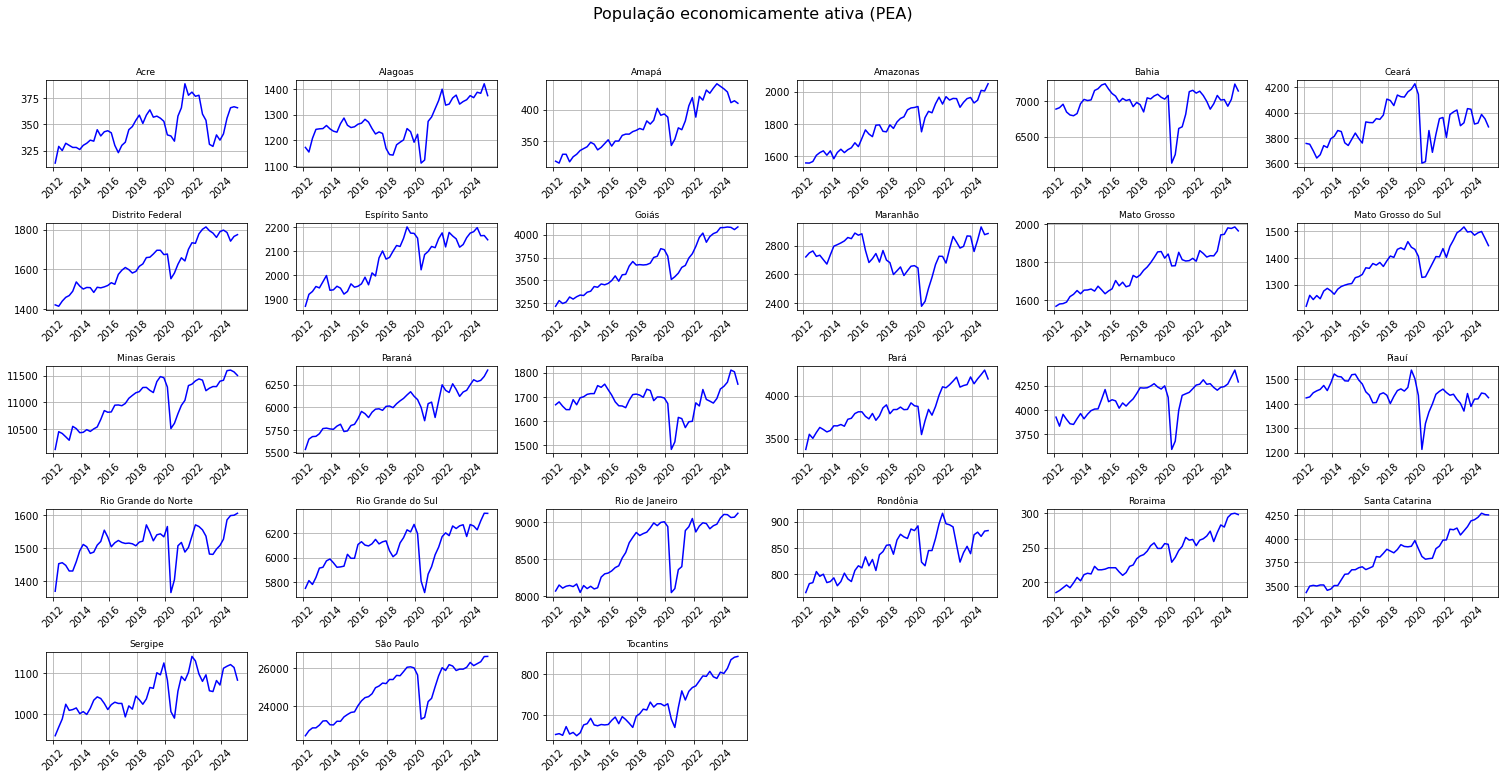

In [14]:
plot_series(pea, 'População economicamente ativa (PEA)')

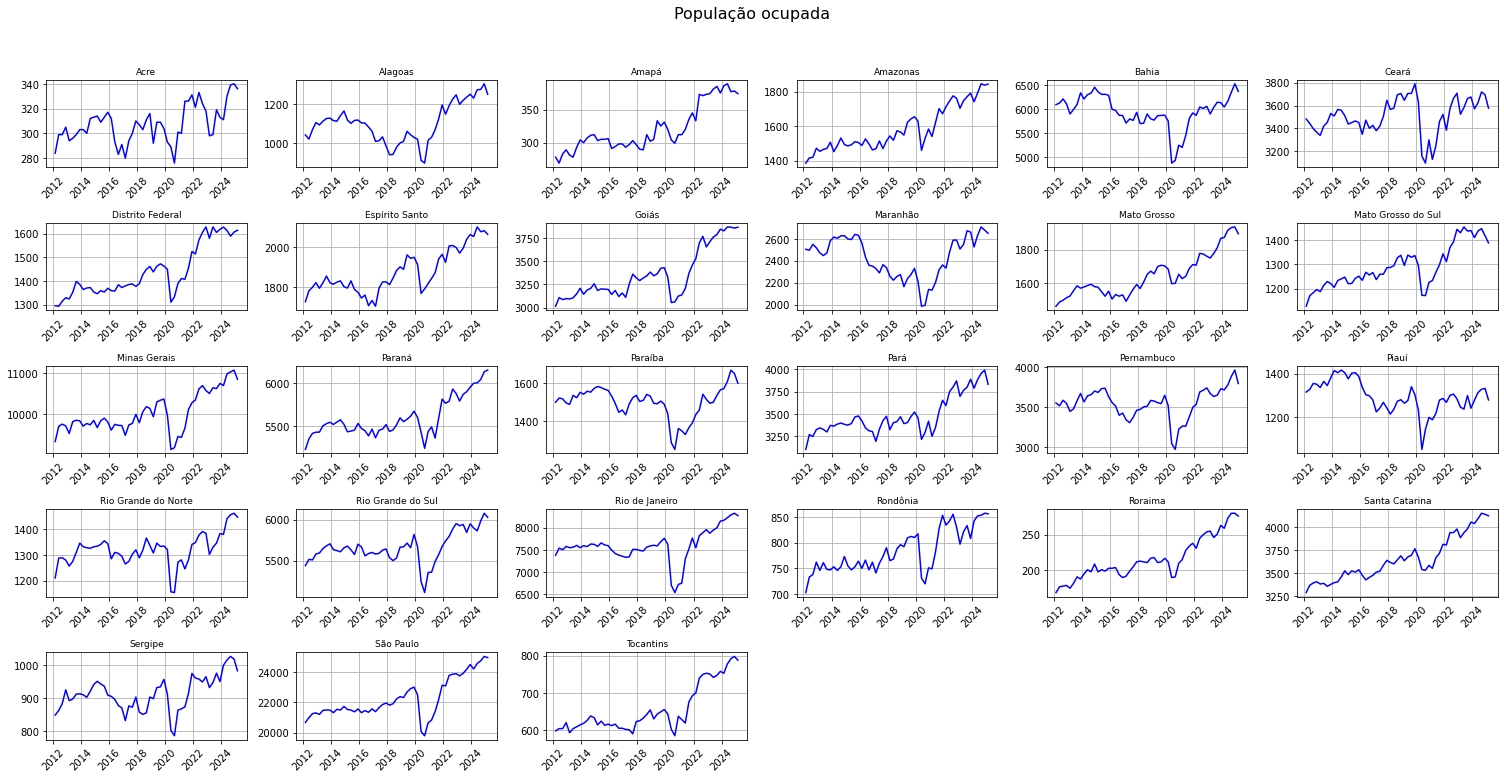

In [15]:
plot_series(ocup, 'População ocupada')

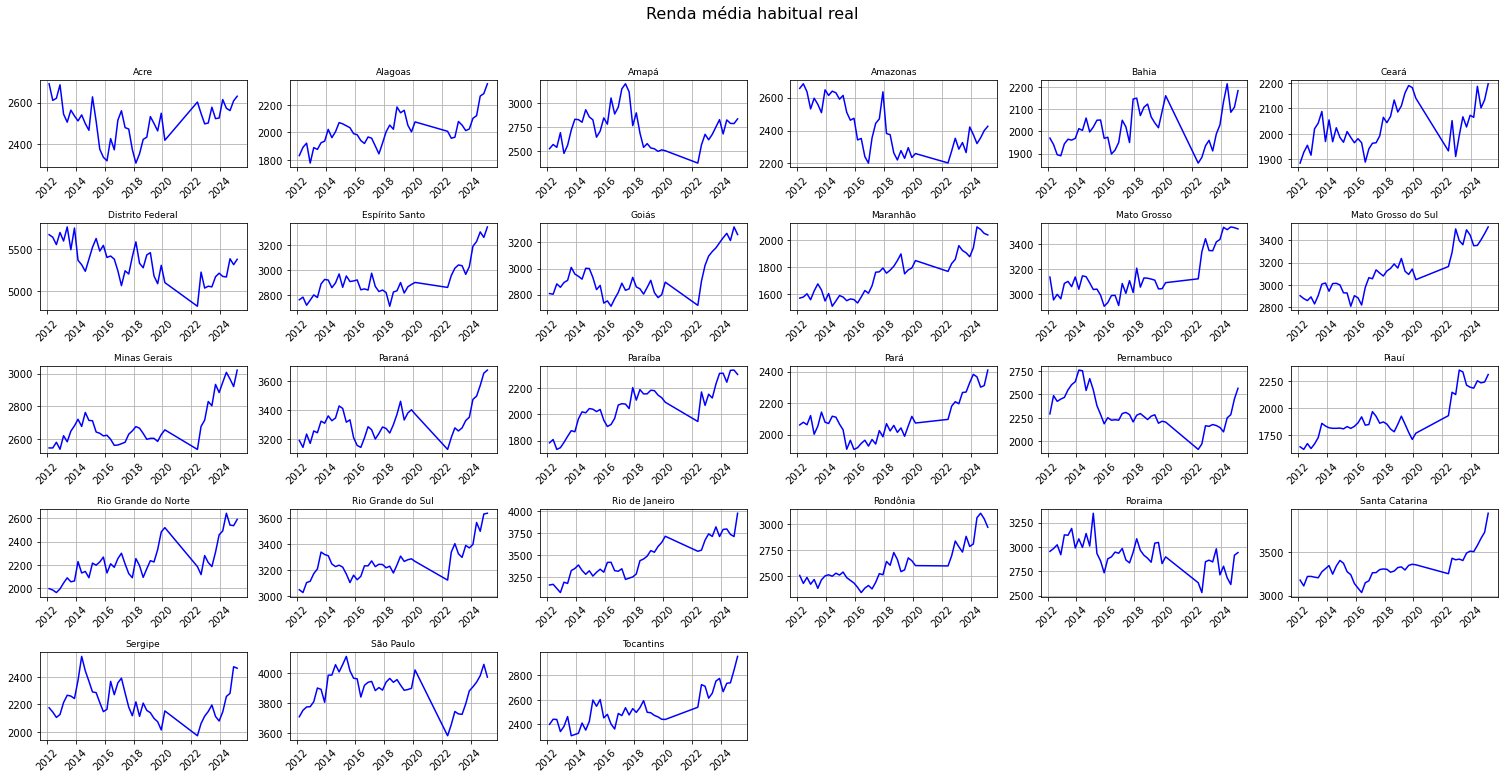

In [16]:
plot_series(renda, 'Renda média habitual real')

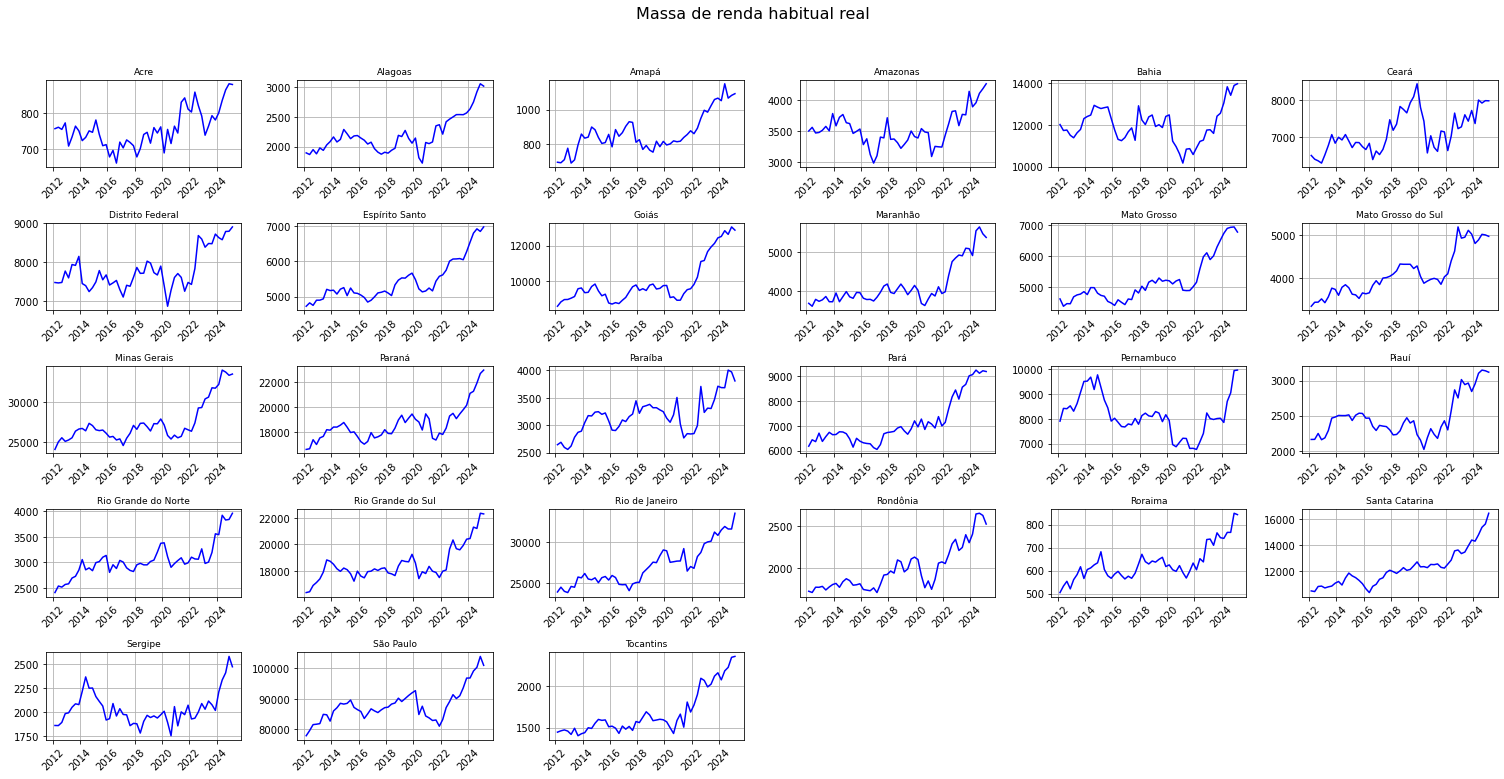

In [17]:
plot_series(massa, 'Massa de renda habitual real')

---

#### A questão aqui é: o que chamaremos de similaridade para podermos criar os clusters para os estados?

> https://www.youtube.com/watch?v=xwZy3L1M9Is&list=TLPQMjAwNjIwMjWWof0As9x6uA&index=2

``Exemplo de aplicação:``

- Grandes empresas de bens de consumo usam essa técnica para prever o padrão de vendas de produtos recém-lançados.

- Produtos recém-lançados podem ser atribuídos a grupos (clusters) de produtos antigos com base nas características desses grupos.

- Os grupos de produtos antigos são criados a partir da clusterização de séries temporais de dados de vendas.

---

- Time series clustering using K means with Euclidean and DTW distance

- How to decide the number of clusters ?

- How can we calculate performance of clustering ?

In [18]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.barycenters import dtw_barycenter_averaging

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram
from tqdm.autonotebook import tqdm

SEED=23

C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\2698721756.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# APLICAÇÃO 1: RENDA MÉDIA

> https://www.kaggle.com/code/raskoshik/time-series-clustering-store-sales

### Extração de Características de Séries Temporais

Em geral, o agrupamento de séries temporais pode ser dividido em 2 tipos:

- Abordagem Baseada em Características: tentamos extrair tudo o que for possível do sinal/série temporal (extração de características)

- Abordagem Baseada em Dados Brutos: aplicada diretamente aos vetores de séries temporais sem nenhuma transformação espacial

Neste caderno, usaremos a abordagem Baseada em Dados Brutos. Isso significa que teremos uma matriz de características onde:

- Linhas: Diferentes Séries Temporais (estados no nosso caso)

- Características: Observações Temporais (valor)

Neste caso, estaremos agrupando em um espaço de alta dimensão e provavelmente encontraremos um problema conhecido como ``Maldição da Dimensionalidade``. Como resultado, os clusters obtidos podem ter formas esparsas, sobrepor-se a outros clusters e assim por diante.

Para evitar isso, precisaremos usar métodos de redução de dimensionalidade (t-SNE, PCA, MDS...)


### Métodos de Agrupamento

Vamos nos concentrar nos seguintes métodos de agrupamento:

- K-Means/TimeSeriesKMeans: (biblioteca ts_learn)

- Agrupamento Aglomerativo Hierárquico

Mas qualquer algoritmo de agrupamento conhecido pode ser aplicado.

Se a série temporal for um sinal (dados de vários dispositivos), a melhor maneira de extrair características seria por meio de métodos da área de processamento de sinais.

Por exemplo, a Transformada de Fourier para encontrar diferentes frequências, espectrogramas e transformações wavelet.

Se a série apresentar ruído, seria interessante suavizá-la primeiro (vários métodos de suavização) para não encontrar padrões falsos.

---

### 1. Create the main feature matrix:


In [19]:
series_df = renda.pivot(index='uf', columns='data', values='valor')
series_df = series_df.dropna(axis='columns')
series_df.head()

data      2012-03-01  2012-06-01  2012-09-01  2012-12-01  2013-03-01  \
uf                                                                     
Acre          2691.0      2611.0      2621.0      2686.0      2545.0   
Alagoas       1832.0      1892.0      1922.0      1778.0      1890.0   
Amapá         2526.0      2570.0      2540.0      2693.0      2477.0   
Amazonas      2657.0      2685.0      2636.0      2532.0      2597.0   
Bahia         1970.0      1941.0      1895.0      1890.0      1944.0   

data      2013-06-01  2013-09-01  2013-12-01  2014-03-01  2014-06-01  ...  \
uf                                                                    ...   
Acre          2506.0      2564.0      2536.0      2512.0      2541.0  ...   
Alagoas       1877.0      1925.0      1937.0      2022.0      1962.0  ...   
Amapá         2562.0      2720.0      2833.0      2829.0      2802.0  ...   
Amazonas      2560.0      2509.0      2648.0      2614.0      2640.0  ...   
Bahia         1965.0      1961.0      1969.0      2013.0      2005.0  ...   

data      2022-12-01  2023-03-01  2023-06-01  2023-09-01  2023-12-01  \
uf                                                                     
Acre          2498.0      2502.0      2578.0      2523.0      2526.0   
Alagoas       1965.0      2079.0      2053.0      2013.0      2025.0   
Amapá         2676.0      2619.0      2676.0      2753.0      2829.0   
Amazonas      2353.0      2287.0      2327.0      2266.0      2422.0   
Bahia         1935.0      1960.0      1912.0      1989.0      2030.0   

data      2024-03-01  2024-06-01  2024-09-01  2024-12-01  2025-03-01  
uf                                                                    
Acre          2615.0      2573.0      2562.0      2609.0      2631.0  
Alagoas       2102.0      2121.0      2263.0      2281.0      2352.0  
Amapá         2680.0      2826.0      2790.0      2788.0      2837.0  
Amazonas      2376.0      2321.0      2356.0      2400.0      2426.0  
Bahia         2135.0      2216.0      2087.0      2110.0      2185.0  

[5 rows x 45 columns]

---

### 2 Time Series Scaling

Scaling must be applied to each series independently

In [20]:
# Scaling
scaler = StandardScaler()

# First transposition - to have series in columns (allows scaling each series independently)
# Second Transposition - come back to initial feature matrix shape (n_series x time_observations)
scaler = StandardScaler()
scaled_ts = scaler.fit_transform(series_df.T).T 

In [21]:
scaled_ts

array([[ 1.95659467,  1.09623791,  1.2037825 , ...,  0.56926939,
         1.07472899,  1.3113271 ],
       [-1.58146771, -1.05850839, -0.79702873, ...,  2.17512338,
         2.33201117,  2.95084636],
       [-1.10596671, -0.87108373, -1.03123122, ...,  0.30333121,
         0.29265471,  0.55422895],
       ...,
       [-0.33856426, -0.58429639, -0.89344325, ...,  0.49375423,
         2.02363488,  1.93643961],
       [-1.64457251, -1.26309951, -1.06792727, ...,  0.7773375 ,
         1.44269739,  0.68862285],
       [-0.86170195, -0.57697875, -0.590537  , ...,  1.44320012,
         2.14822899,  2.90749084]])

---

### 3 Time Series K-Means¶

**Ao usar o agrupamento K-Means, é melhor usar a Abordagem Baseada em Características**. Extraímos um conjunto de características da série e esperamos que elas descrevam bem a série temporal, para então realizar o agrupamento. Gostaria de demonstrar uma solução pronta para uso (Abordagem de Dados Brutos). Para a Abordagem Baseada em Características, você precisa obter características para cada série e agrupá-las usando qualquer algoritmo de agrupamento. Estas bibliotecas podem ajudar:

- ts_fel

- ts_fresh

É importante como definimos a similaridade entre observações em um espaço de características. Ao usar o KMeans, podemos usar:

- Distância Euclidiana

- Correspondência Dinâmica de Distorção Temporal (DTW)

> Ao usar a Correspondência Dinâmica de Distorção Temporal, a abordagem baseada em características não é adequada, pois estamos tentando determinar uma medida da similaridade da série (como elas se sobrepõem, tamanho/similaridade/localização dos picos...).

> Para DTW, é melhor reduzir a amostragem da série usando reamostragem (ou seja, alterar a frequência da série). Por exemplo, em vez de observações/ticks de minutos, considere observações de 5/10/15 minutos, mas devemos ter em mente que os principais padrões (picos, flutuações) se enquadram nesse intervalo. Isso permite manter a estrutura da série, tornando-a mais curta e, portanto, muito mais rápida para identificar séries semelhantes com DTW.

Primeiro, aplique o algoritmo KMeans da biblioteca ts_learn.

In [22]:
# Run KMeans and plot the results 
def get_kmeans_results(data, max_clusters=10, metric='euclidean', seed=23):
    """
    Runs KMeans n times (according to max_cluster range)

    data: pd.DataFrame or np.array
        Time Series Data
    max_clusters: int
        Number of different clusters for KMeans algorithm
    metric: str
        Distance metric between the observations
    seed: int
        random seed
    Returns: 
    -------
    None      
    """
    # Main metrics
    distortions = []
    silhouette = []
    clusters_range = range(1, max_clusters+1)
    
    for K in tqdm(clusters_range):
        kmeans_model = TimeSeriesKMeans(n_clusters=K, metric=metric, n_jobs=-1, max_iter=10, random_state=seed)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
        if K > 1:
            silhouette.append(silhouette_score(data, kmeans_model.labels_))
        
    # Visualization
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range[1:], silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette');

**Let's try finding similar series using DTW metric:**

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be rem


CPU times: total: 8.33 s
Wall time: 8.18 s


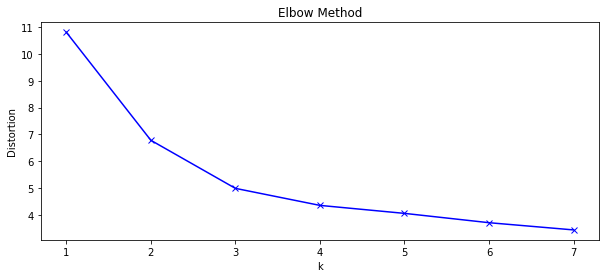

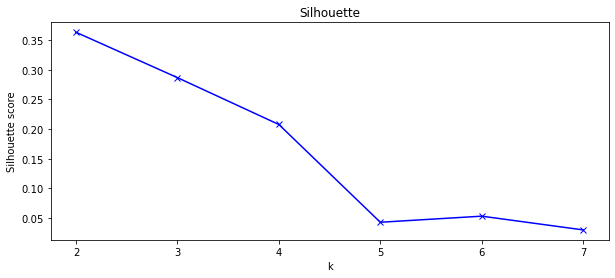

In [23]:
%%time

# Run the algorithm using DTW algorithm 
get_kmeans_results(data=scaled_ts, max_clusters=7, metric='dtw', seed=SEED)

> Bem, dificilmente podemos dizer algo de acordo com o Método do Cotovelo, mas a Silhouette diz que 2 clusters são bons. Vamos dar uma olhada nos clusters obtidos.

        📈 Gráfico 1: Elbow Method
        O eixo x representa o número de clusters (k).

        O eixo y mostra a distância intra-cluster (inertia, distorção ou soma dos quadrados intra-cluster).

        O objetivo é encontrar um “cotovelo” onde o ganho (redução na distorção) diminui fortemente.

        📌 Neste gráfico:

        A curva é quase linear, sem uma queda clara indicando o “cotovelo”.

        Isso sugere que não há um número ideal de clusters claramente definido com este método.

        📊 Gráfico 2: Silhouette Score
        O eixo x também representa o número de clusters.

        O eixo y mostra o Silhouette Score, que varia de -1 a 1:

        Valor alto = bons clusters, bem separados.

        Valor baixo = clusters sobrepostos ou mal definidos.

        📌 Neste gráfico:

        O melhor score está em k = 2 (cerca de 0.35).

        O score cai fortemente à medida que o número de clusters aumenta.

In [24]:
# Visualization for obtained clusters   
def plot_clusters(data, cluster_model, dim_red_algo):
    """
    Plots clusters obtained by clustering model 

    data: pd.DataFrame or np.array
        Time Series Data
    cluster_model: Class
        Clustering algorithm 
    dim_red_algo: Class
        Dimensionality reduction algorithm (e.g. TSNE/PCA/MDS...) 
    Returns:
    -------
    None
    """
    cluster_labels = cluster_model.fit_predict(data)
    centroids = cluster_model.cluster_centers_
    u_labels = np.unique(cluster_labels)
    
    # Centroids Visualization
    plt.figure(figsize=(16, 10))
    plt.scatter(centroids[:, 0] , centroids[:, 1] , s=150, color='r', marker="x")
    
    # Downsize the data into 2D
    if data.shape[1] > 2:
        data_2d = dim_red_algo.fit_transform(data)
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)
    else:
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)

    plt.title('Clustered Data')
    plt.xlabel("Feature space for the 1st feature")
    plt.ylabel("Feature space for the 2nd feature")
    plt.grid(True)
    plt.legend(title='Cluster Labels');

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CPU times: total: 1 s
Wall time: 939 ms


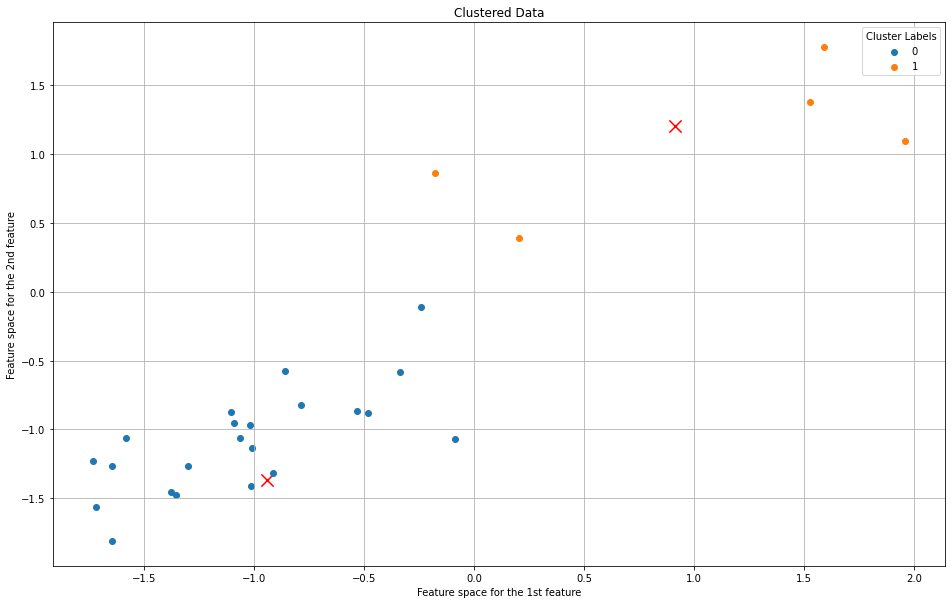

In [25]:
%%time

# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=2, metric='dtw', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=scaled_ts,
              cluster_model=model,
              dim_red_algo=TSNE(n_components=2, perplexity=min(5, scaled_ts.shape[0] - 1), init='pca', random_state=SEED))

        Detalhes: 

        - Os pontos azuis pertencem ao Cluster 0

        - Os pontos laranja pertencem ao Cluster 1

        - Os "X" vermelhos são os centróides de cada cluster
        
        Sobre o resultado:
        
        - Cluster 0 (azul): contém a maioria dos pontos, bem distribuídos ao longo de uma linha diagonal.

        - Cluster 1 (laranja): tem poucos pontos isolados, longe da densidade principal. 
            (Parece capturar outliers ou ruído (pontos que não pertencem bem ao padrão dominante)).

**MultiDimensional Scaling (MDS):**

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be rem

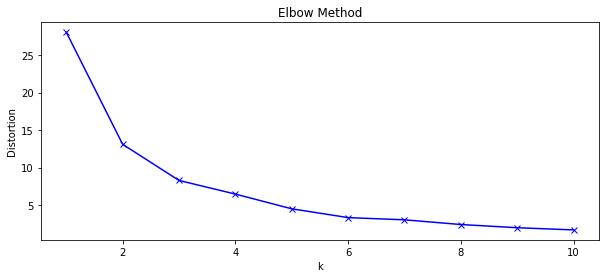

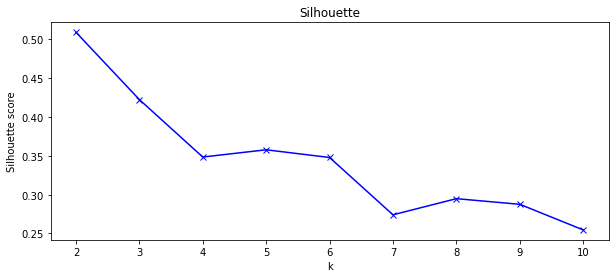

In [26]:
mds = MDS(n_components=2, n_init=3, max_iter=100, random_state=SEED)
data_mds = mds.fit_transform(scaled_ts) 

get_kmeans_results(data=data_mds, max_clusters=10, metric='euclidean', seed=SEED)

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


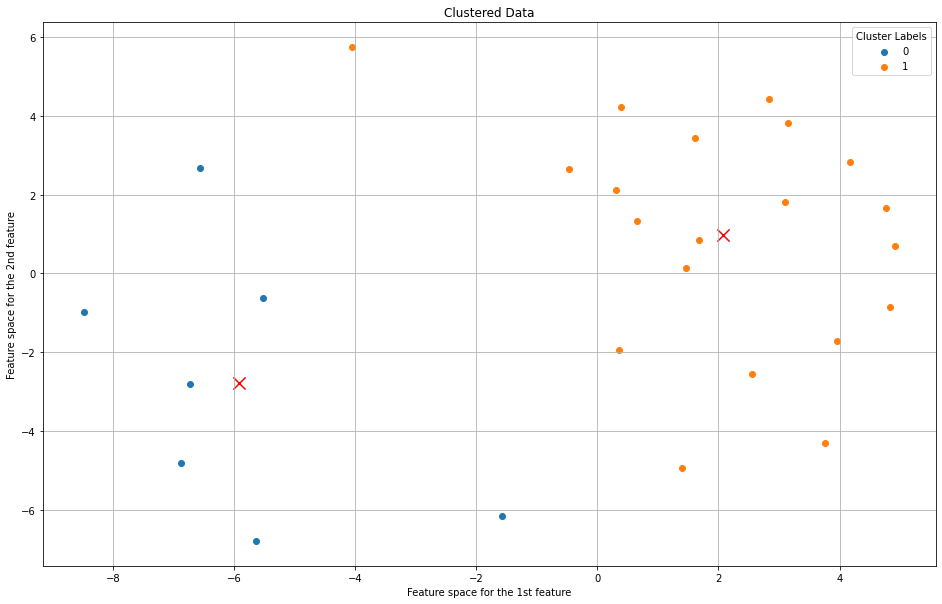

In [27]:
# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=2, metric='euclidean', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=data_mds,
              cluster_model=model,
              dim_red_algo=TSNE(n_components=2, init='pca', random_state=SEED))

---

### 4 Time Series KMeans Results¶

Por fim, escolheremos TimeSeriesKMeans com recursos reduzidos usando MDS e 2 clusters. 

In [28]:
# Train TimeSeriesKMeans with MDS
cluster_labels = model.fit_predict(data_mds)

ts_clustered = [ scaled_ts[(cluster_labels == lable), :] for lable in np.unique(cluster_labels)]

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


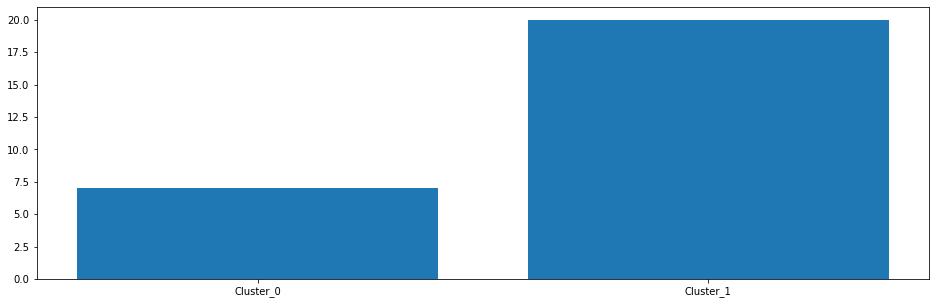

In [29]:
# Objects distribution in the obtained clusters 
labels = [f'Cluster_{i}' for i in range(len(ts_clustered))]
samples_in_cluster = [val.shape[0] for val in ts_clustered]

plt.figure(figsize=(16,5))
plt.bar(labels, samples_in_cluster);

In [30]:
def plot_cluster_ts(current_cluster):
    """
    Plots time series in a cluster 

    current_cluster: np.array
        Cluster with time series 
    Returns:
    -------
    None 
    """
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),4,
        figsize=(45, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)
    for indx, series in enumerate(current_cluster):
        ax[indx].plot(series)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show();

Let's have a look at the obtained clusters

==========Cluster number: 0==========


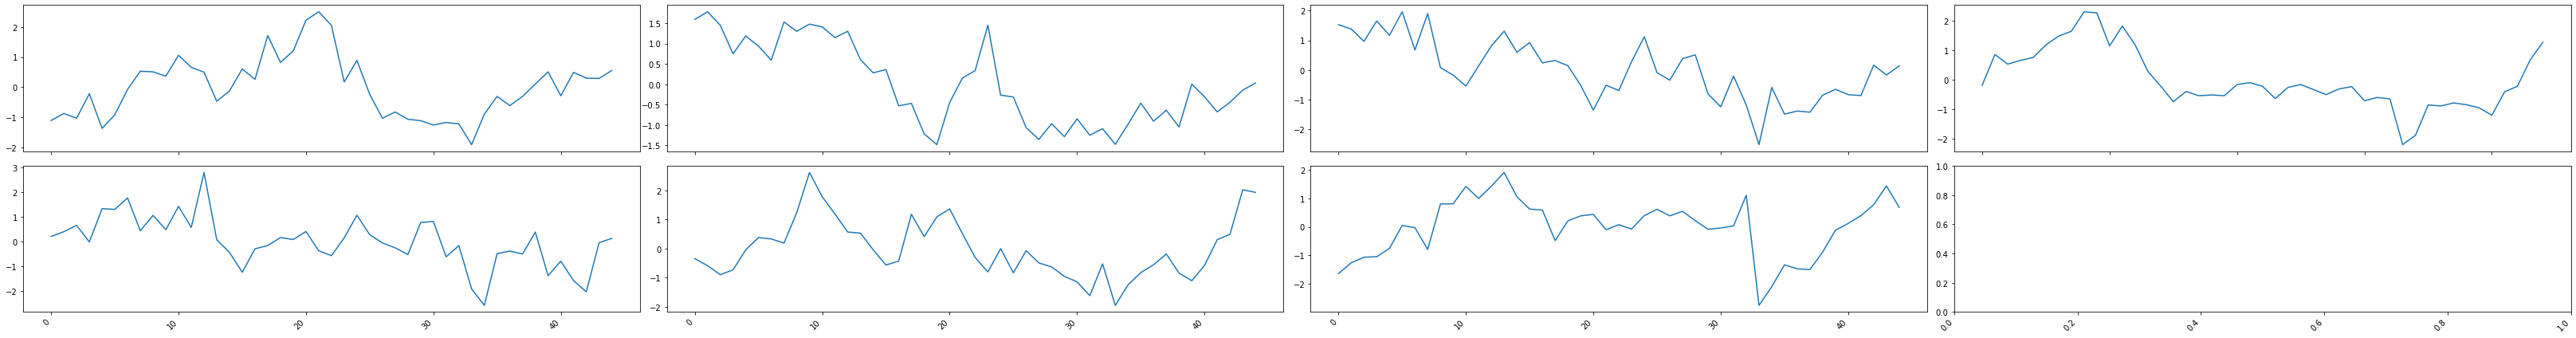

==========Cluster number: 1==========


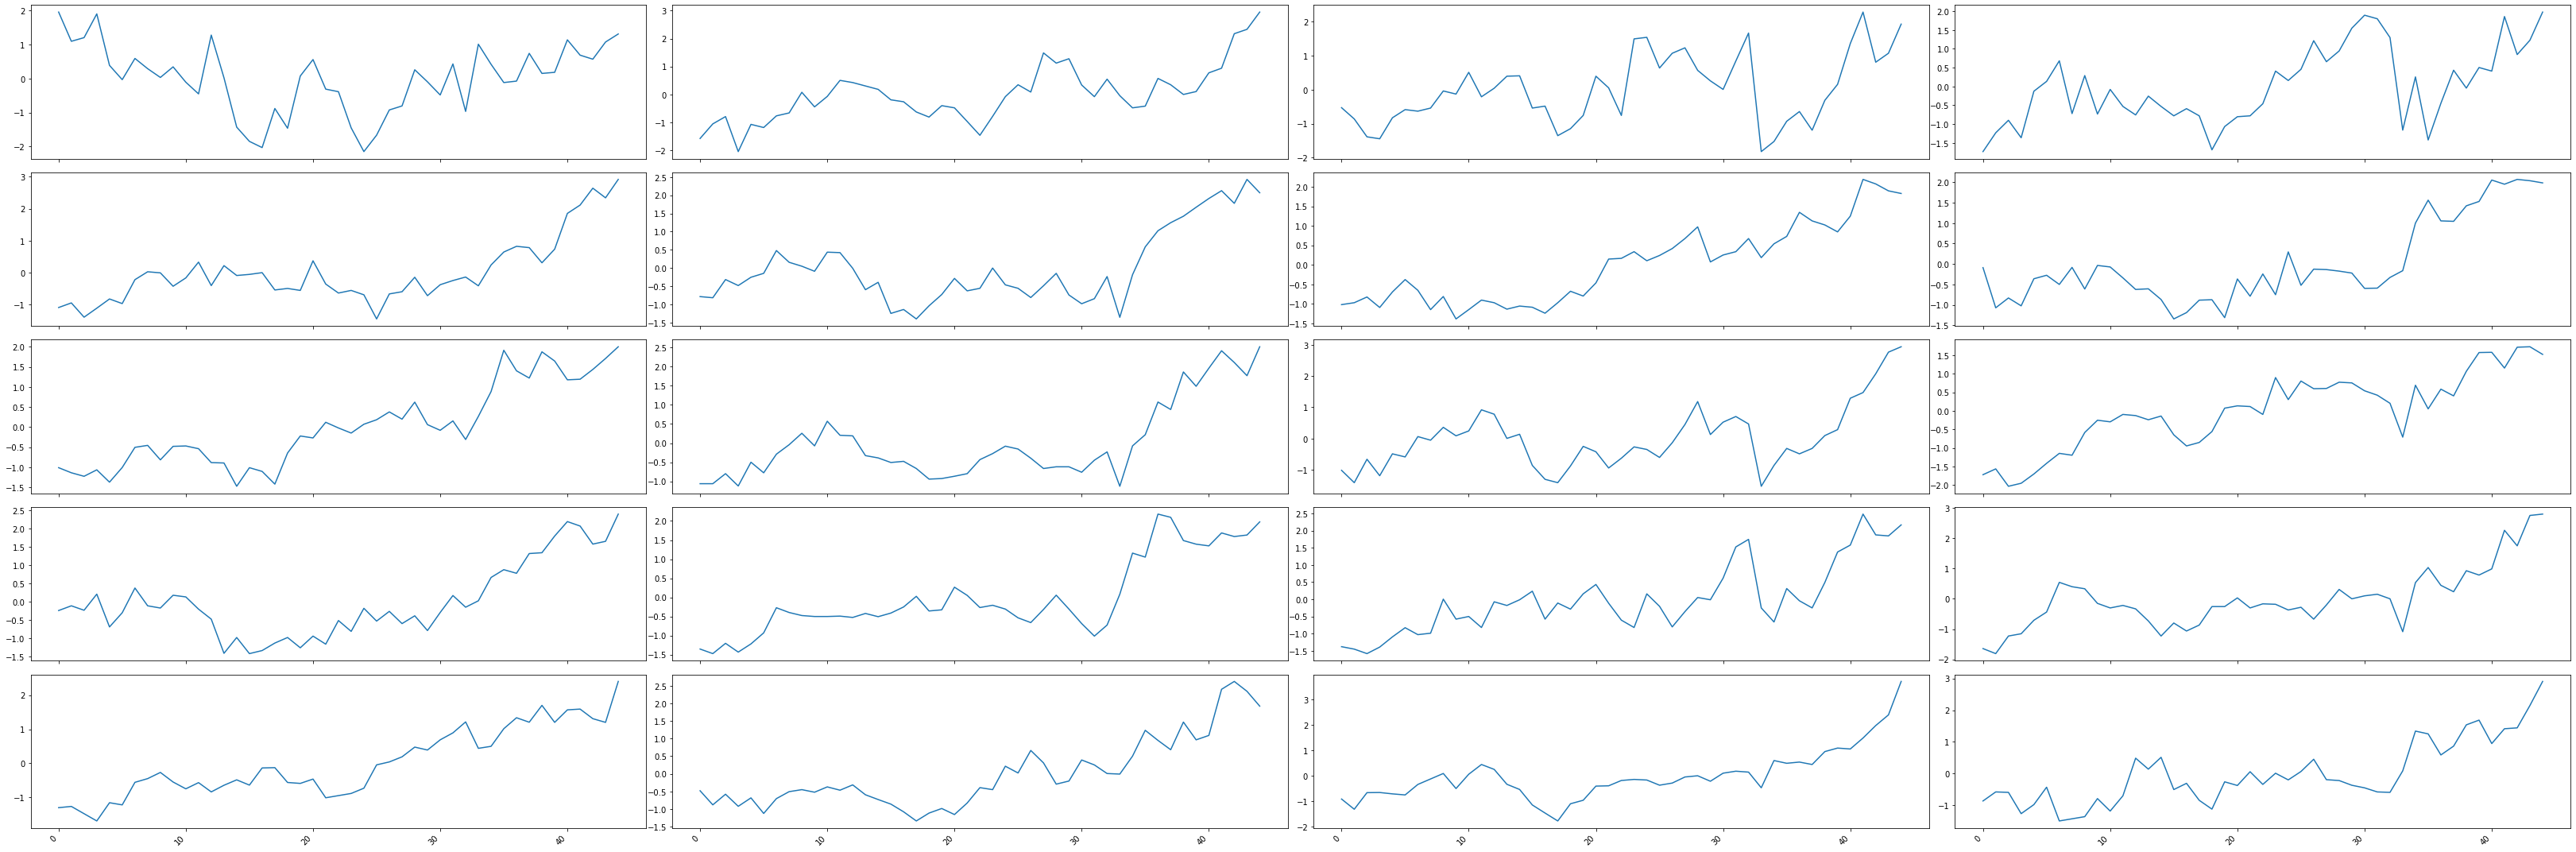

In [31]:
for cluster in range(len(ts_clustered)):
    print(f"==========Cluster number: {cluster}==========")
    plot_cluster_ts(ts_clustered[cluster])

A maioria das séries dentro do seu cluster são parecidas, o que é ótimo.

---

### 5. [Mapeamento de Clusters](https://www.kaggle.com/code/izzettunc/introduction-to-time-series-clustering/notebook)

Bem, nós agrupamos nossas séries, mas como sabemos qual série pertence a qual cluster? Não é esse o propósito do agrupamento?

Como podemos ver nas ilustrações, cada nó (ou múltiplos de nós em alguns casos) representa um cluster. Portanto, podemos descobrir qual série pertence a qual cluster verificando o nó vencedor de cada série.

In [32]:
# Supondo que series_df.index são os nomes das UFs
ufs = series_df.index.to_list()

# Cria um DataFrame com UF e cluster
cluster_df = pd.DataFrame({
    'UF': ufs,
    'cluster': cluster_labels
})

# Para pegar as UFs de cada cluster
clusters = {}
for cluster_id in np.unique(cluster_labels):
    clusters[cluster_id] = cluster_df.loc[cluster_df['cluster'] == cluster_id, 'UF'].to_list()

# Exemplo de impressão
for cluster_id, uf_list in clusters.items():
    print(f"Cluster {cluster_id}: {uf_list}")


Cluster 0: ['Amapá', 'Amazonas', 'Distrito Federal', 'Pernambuco', 'Roraima', 'Sergipe', 'São Paulo']
Cluster 1: ['Acre', 'Alagoas', 'Bahia', 'Ceará', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná', 'Paraíba', 'Pará', 'Piauí', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Santa Catarina', 'Tocantins']


In [33]:
cluster_labels

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1], dtype=int64)

C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


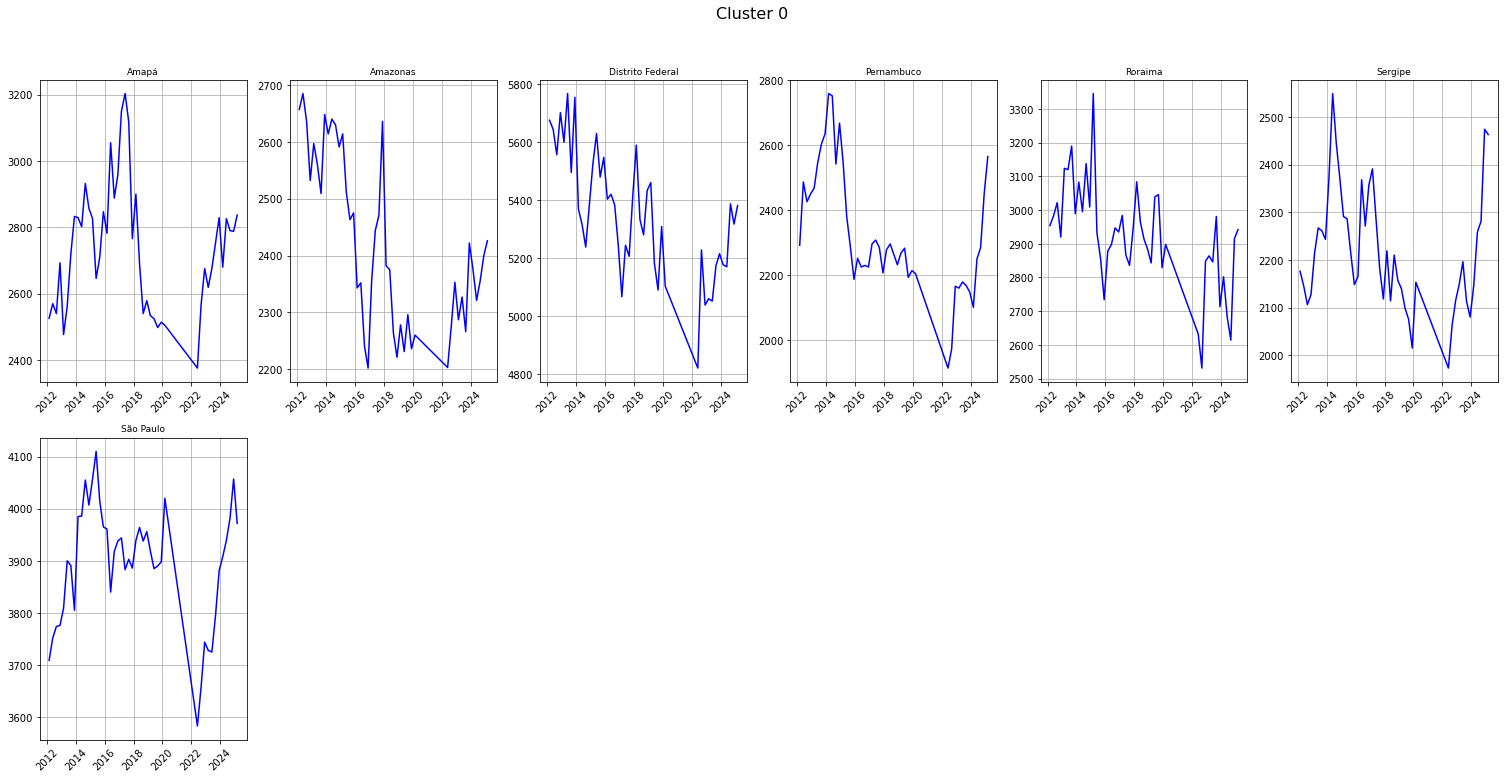

In [34]:
plot_series(renda[renda.uf.isin(['Amapá', 'Amazonas', 'Distrito Federal', 'Pernambuco', 'Roraima', 'Sergipe', 'São Paulo'])], 'Cluster 0')

C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


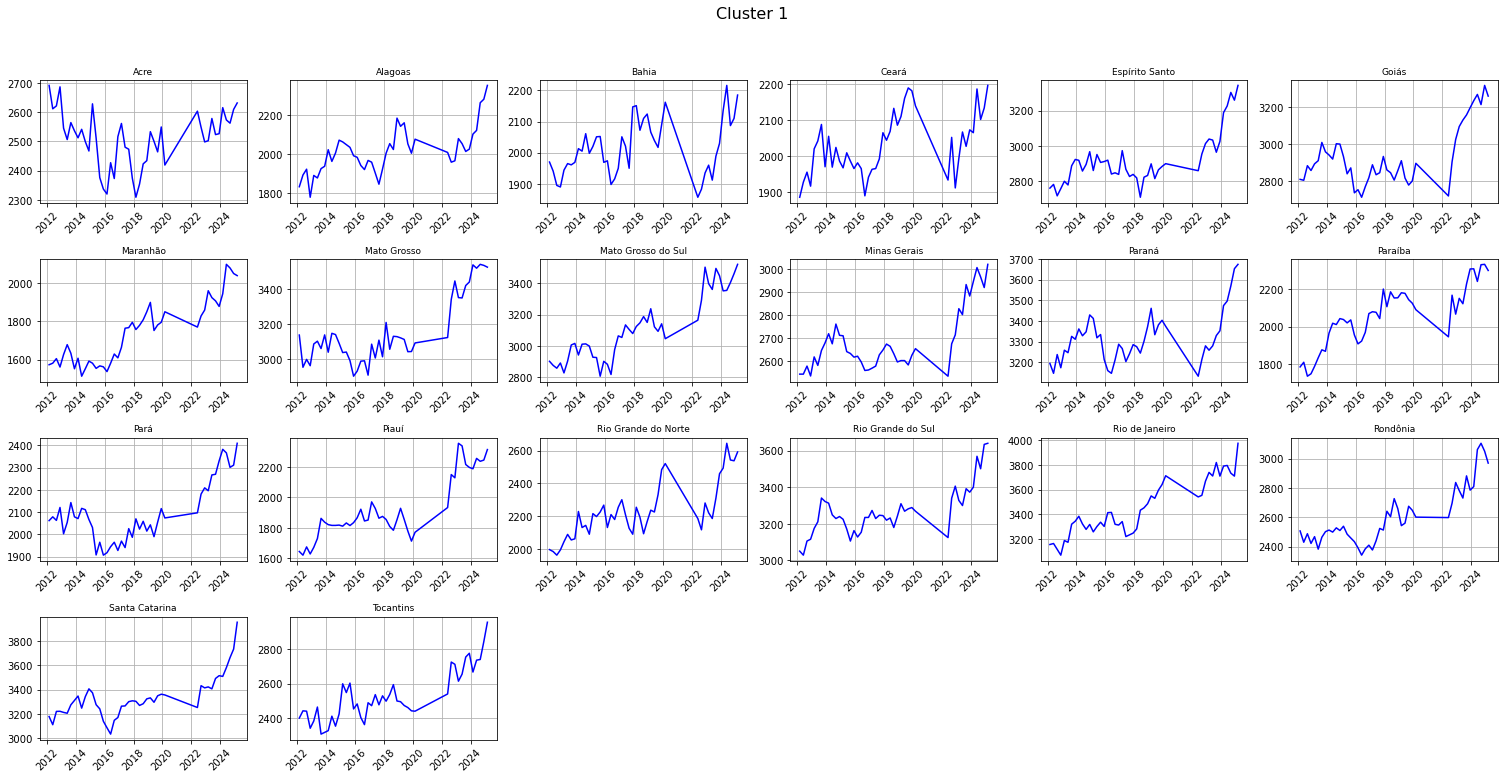

In [35]:
plot_series(renda[~renda.uf.isin(['Amapá', 'Amazonas', 'Distrito Federal', 'Pernambuco', 'Roraima', 'Sergipe', 'São Paulo'])], 'Cluster 1')

# APLICAÇÃO 2: MASSA DE RENDA

---

### 1. Create the main feature matrix:


In [36]:
series_df = massa.pivot(index='uf', columns='data', values='valor')
series_df = series_df.dropna(axis='columns')
series_df.head()

data      2012-03-01  2012-06-01  2012-09-01  2012-12-01  2013-03-01  \
uf                                                                     
Acre           757.0       761.0       755.0       773.0       709.0   
Alagoas       1892.0      1864.0      1947.0      1876.0      1976.0   
Amapá          692.0       689.0       707.0       774.0       687.0   
Amazonas      3502.0      3561.0      3471.0      3479.0      3514.0   
Bahia        12023.0     11736.0     11758.0     11506.0     11386.0   

data      2013-06-01  2013-09-01  2013-12-01  2014-03-01  2014-06-01  ...  \
uf                                                                    ...   
Acre           734.0       764.0       751.0       724.0       733.0  ...   
Alagoas       1935.0      2027.0      2083.0      2162.0      2077.0  ...   
Amapá          706.0       793.0       857.0       833.0       839.0  ...   
Amazonas      3576.0      3505.0      3781.0      3585.0      3722.0  ...   
Bahia        11625.0     11787.0     12309.0     12409.0     12477.0  ...   

data      2022-12-01  2023-03-01  2023-06-01  2023-09-01  2023-12-01  \
uf                                                                     
Acre           792.0       739.0       764.0       793.0       781.0   
Alagoas       2501.0      2540.0      2541.0      2539.0      2569.0   
Amapá          996.0       985.0      1023.0      1059.0      1067.0   
Amazonas      3825.0      3588.0      3768.0      3761.0      4136.0   
Bahia        11756.0     11773.0     11598.0     12423.0     12565.0   

data      2024-03-01  2024-06-01  2024-09-01  2024-12-01  2025-03-01  
uf                                                                    
Acre           801.0       835.0       864.0       881.0       879.0  
Alagoas       2636.0      2753.0      2926.0      3063.0      3023.0  
Amapá         1052.0      1151.0      1067.0      1083.0      1093.0  
Amazonas      3889.0      3954.0      4104.0      4177.0      4257.0  
Bahia        13057.0     13837.0     13428.0     13901.0     13981.0  

[5 rows x 53 columns]

---

### 2 Time Series Scaling

Scaling must be applied to each series independently

In [37]:
# Scaling
scaler = StandardScaler()

# First transposition - to have series in columns (allows scaling each series independently)
# Second Transposition - come back to initial feature matrix shape (n_series x time_observations)
scaler = StandardScaler()
scaled_ts = scaler.fit_transform(series_df.T).T 

In [38]:
scaled_ts

array([[-0.00623734,  0.071546  , -0.04512901, ...,  2.07446698,
         2.40504617,  2.3661545 ],
       [-1.00302711, -1.09559504, -0.82119726, ...,  2.41537412,
         2.86829576,  2.73605586],
       [-1.54248632, -1.56941969, -1.40781943, ...,  1.82418572,
         1.96783039,  2.05760831],
       ...,
       [-1.05274601, -1.05867414, -0.86304592, ...,  2.20772427,
         3.22143412,  2.58119632],
       [-1.87594541, -1.55992968, -1.19890116, ...,  2.29616616,
         2.96209615,  2.41768217],
       [-0.86557699, -0.80532339, -0.76389905, ...,  2.06801988,
         2.52368769,  2.56511203]])

---

### 3 Time Series K-Means¶

**Ao usar o agrupamento K-Means, é melhor usar a Abordagem Baseada em Características**. Extraímos um conjunto de características da série e esperamos que elas descrevam bem a série temporal, para então realizar o agrupamento. Gostaria de demonstrar uma solução pronta para uso (Abordagem de Dados Brutos). Para a Abordagem Baseada em Características, você precisa obter características para cada série e agrupá-las usando qualquer algoritmo de agrupamento. Estas bibliotecas podem ajudar:

- ts_fel

- ts_fresh

É importante como definimos a similaridade entre observações em um espaço de características. Ao usar o KMeans, podemos usar:

- Distância Euclidiana

- Correspondência Dinâmica de Distorção Temporal (DTW)

> Ao usar a Correspondência Dinâmica de Distorção Temporal, a abordagem baseada em características não é adequada, pois estamos tentando determinar uma medida da similaridade da série (como elas se sobrepõem, tamanho/similaridade/localização dos picos...).

> Para DTW, é melhor reduzir a amostragem da série usando reamostragem (ou seja, alterar a frequência da série). Por exemplo, em vez de observações/ticks de minutos, considere observações de 5/10/15 minutos, mas devemos ter em mente que os principais padrões (picos, flutuações) se enquadram nesse intervalo. Isso permite manter a estrutura da série, tornando-a mais curta e, portanto, muito mais rápida para identificar séries semelhantes com DTW.

Primeiro, aplique o algoritmo KMeans da biblioteca ts_learn.

In [39]:
# Run KMeans and plot the results 
def get_kmeans_results(data, max_clusters=10, metric='euclidean', seed=23):
    """
    Runs KMeans n times (according to max_cluster range)

    data: pd.DataFrame or np.array
        Time Series Data
    max_clusters: int
        Number of different clusters for KMeans algorithm
    metric: str
        Distance metric between the observations
    seed: int
        random seed
    Returns: 
    -------
    None      
    """
    # Main metrics
    distortions = []
    silhouette = []
    clusters_range = range(1, max_clusters+1)
    
    for K in tqdm(clusters_range):
        kmeans_model = TimeSeriesKMeans(n_clusters=K, metric=metric, n_jobs=-1, max_iter=10, random_state=seed)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
        if K > 1:
            silhouette.append(silhouette_score(data, kmeans_model.labels_))
        
    # Visualization
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range[1:], silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette');

**Let's try finding similar series using DTW metric:**

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be rem


CPU times: total: 5.45 s
Wall time: 5.42 s


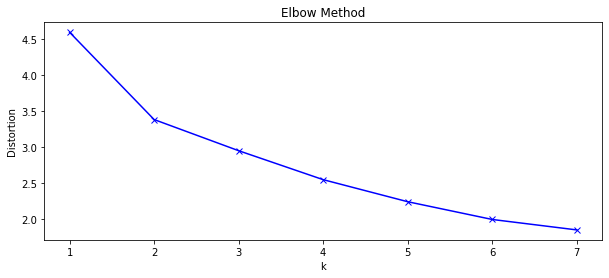

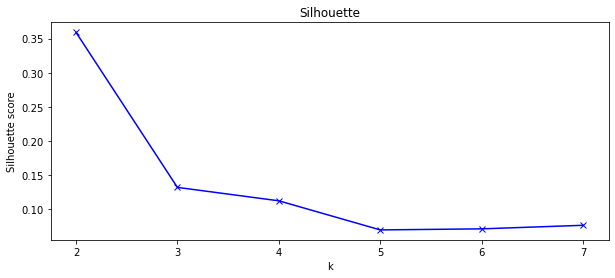

In [40]:
%%time

# Run the algorithm using DTW algorithm 
get_kmeans_results(data=scaled_ts, max_clusters=7, metric='dtw', seed=SEED)

In [41]:
# Visualization for obtained clusters   
def plot_clusters(data, cluster_model, dim_red_algo):
    """
    Plots clusters obtained by clustering model 

    data: pd.DataFrame or np.array
        Time Series Data
    cluster_model: Class
        Clustering algorithm 
    dim_red_algo: Class
        Dimensionality reduction algorithm (e.g. TSNE/PCA/MDS...) 
    Returns:
    -------
    None
    """
    cluster_labels = cluster_model.fit_predict(data)
    centroids = cluster_model.cluster_centers_
    u_labels = np.unique(cluster_labels)
    
    # Centroids Visualization
    plt.figure(figsize=(16, 10))
    plt.scatter(centroids[:, 0] , centroids[:, 1] , s=150, color='r', marker="x")
    
    # Downsize the data into 2D
    if data.shape[1] > 2:
        data_2d = dim_red_algo.fit_transform(data)
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)
    else:
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)

    plt.title('Clustered Data')
    plt.xlabel("Feature space for the 1st feature")
    plt.ylabel("Feature space for the 2nd feature")
    plt.grid(True)
    plt.legend(title='Cluster Labels');

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CPU times: total: 1.02 s
Wall time: 764 ms


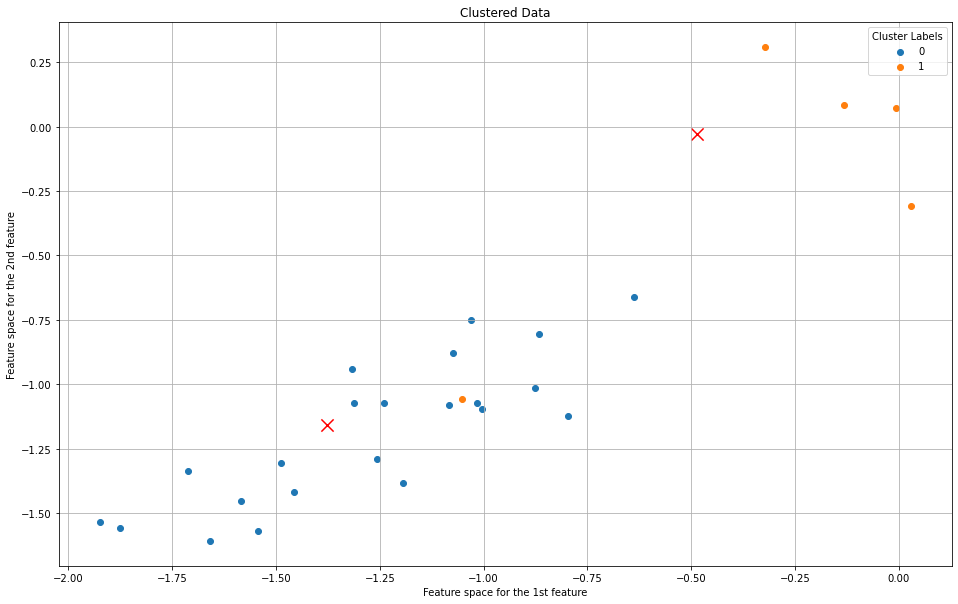

In [42]:
%%time

# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=2, metric='dtw', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=scaled_ts,
              cluster_model=model,
              dim_red_algo=TSNE(n_components=2, perplexity=min(5, scaled_ts.shape[0] - 1), init='pca', random_state=SEED))

**MultiDimensional Scaling (MDS):**

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be rem

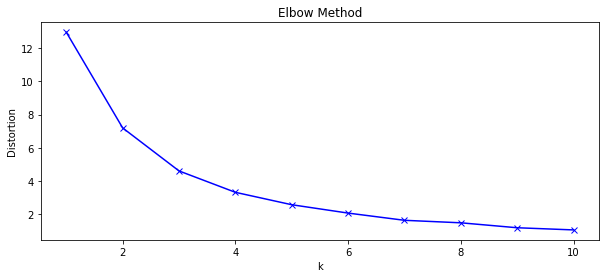

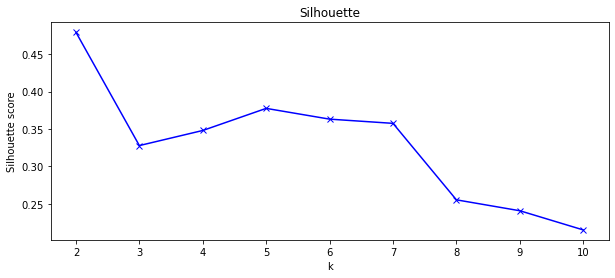

In [43]:
mds = MDS(n_components=2, n_init=3, max_iter=100, random_state=SEED)
data_mds = mds.fit_transform(scaled_ts) 

get_kmeans_results(data=data_mds, max_clusters=10, metric='euclidean', seed=SEED)

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


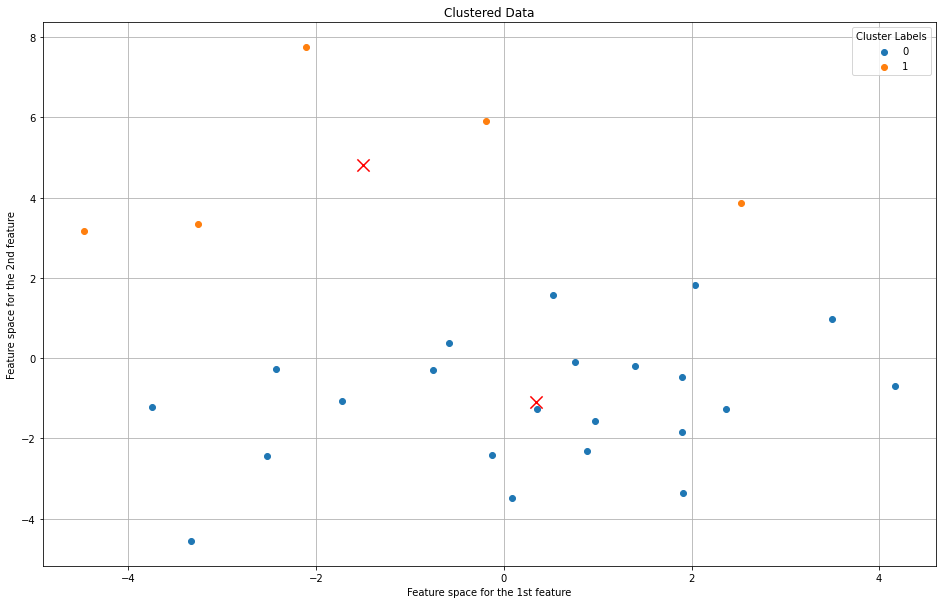

In [44]:
# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=2, metric='euclidean', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=data_mds,
              cluster_model=model,
              dim_red_algo=TSNE(n_components=2, init='pca', random_state=SEED))

---

### 4 Time Series KMeans Results¶

Por fim, escolheremos TimeSeriesKMeans com recursos reduzidos usando MDS e 2 clusters. 

In [45]:
# Train TimeSeriesKMeans with MDS
cluster_labels = model.fit_predict(data_mds)

ts_clustered = [ scaled_ts[(cluster_labels == lable), :] for lable in np.unique(cluster_labels)]

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


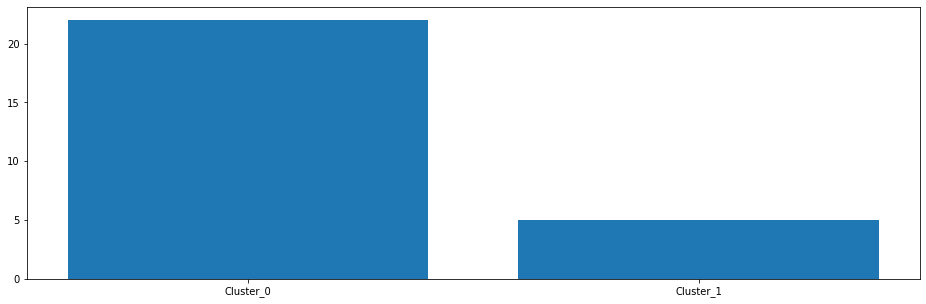

In [46]:
# Objects distribution in the obtained clusters 
labels = [f'Cluster_{i}' for i in range(len(ts_clustered))]
samples_in_cluster = [val.shape[0] for val in ts_clustered]

plt.figure(figsize=(16,5))
plt.bar(labels, samples_in_cluster);

In [47]:
def plot_cluster_ts(current_cluster):
    """
    Plots time series in a cluster 

    current_cluster: np.array
        Cluster with time series 
    Returns:
    -------
    None 
    """
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),4,
        figsize=(45, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)
    for indx, series in enumerate(current_cluster):
        ax[indx].plot(series)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show();

Let's have a look at the obtained clusters

==========Cluster number: 0==========


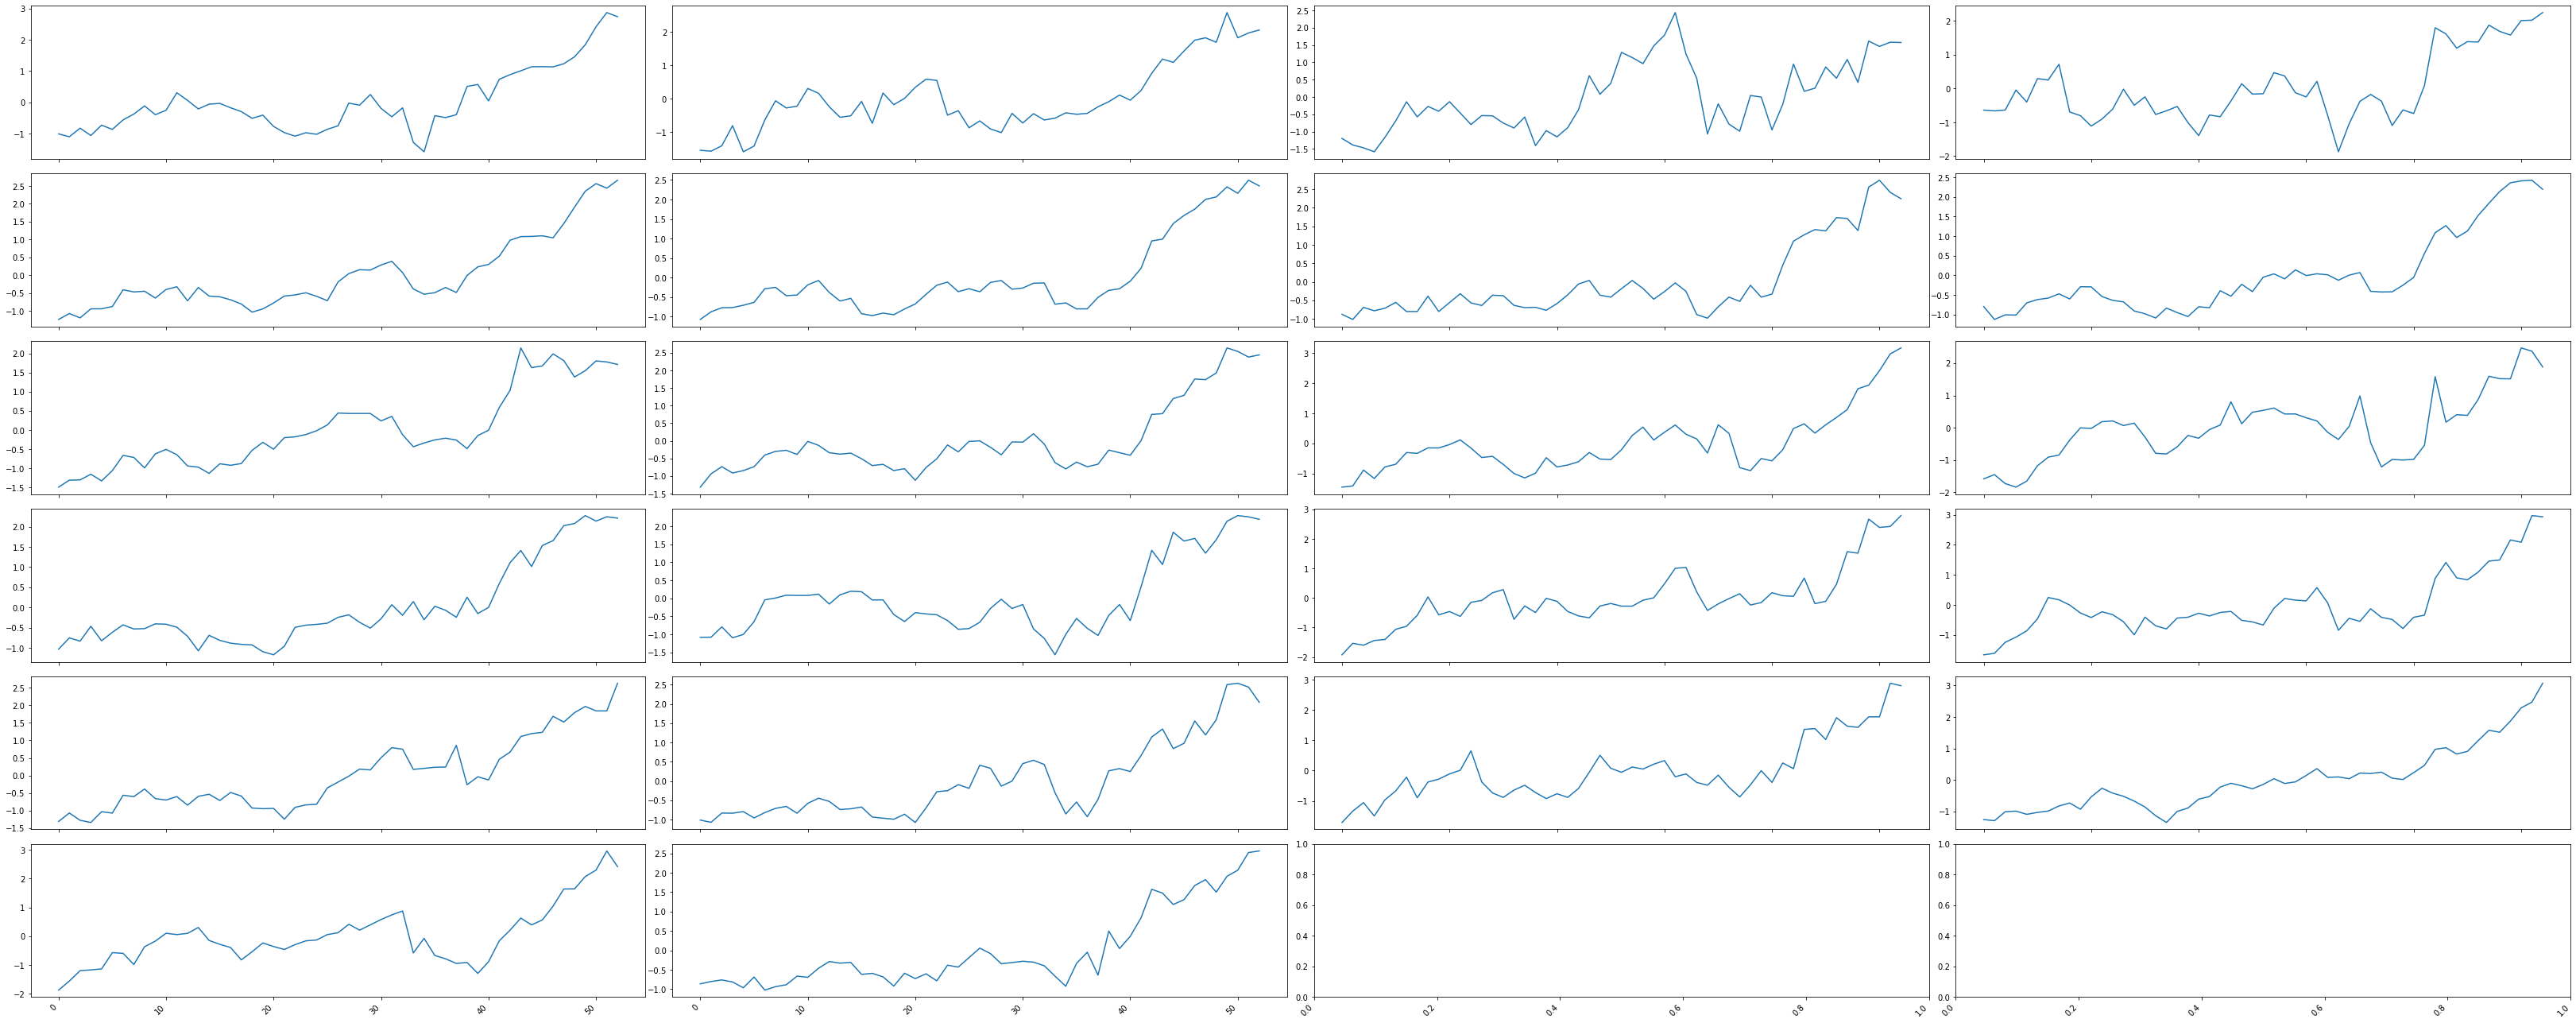

==========Cluster number: 1==========


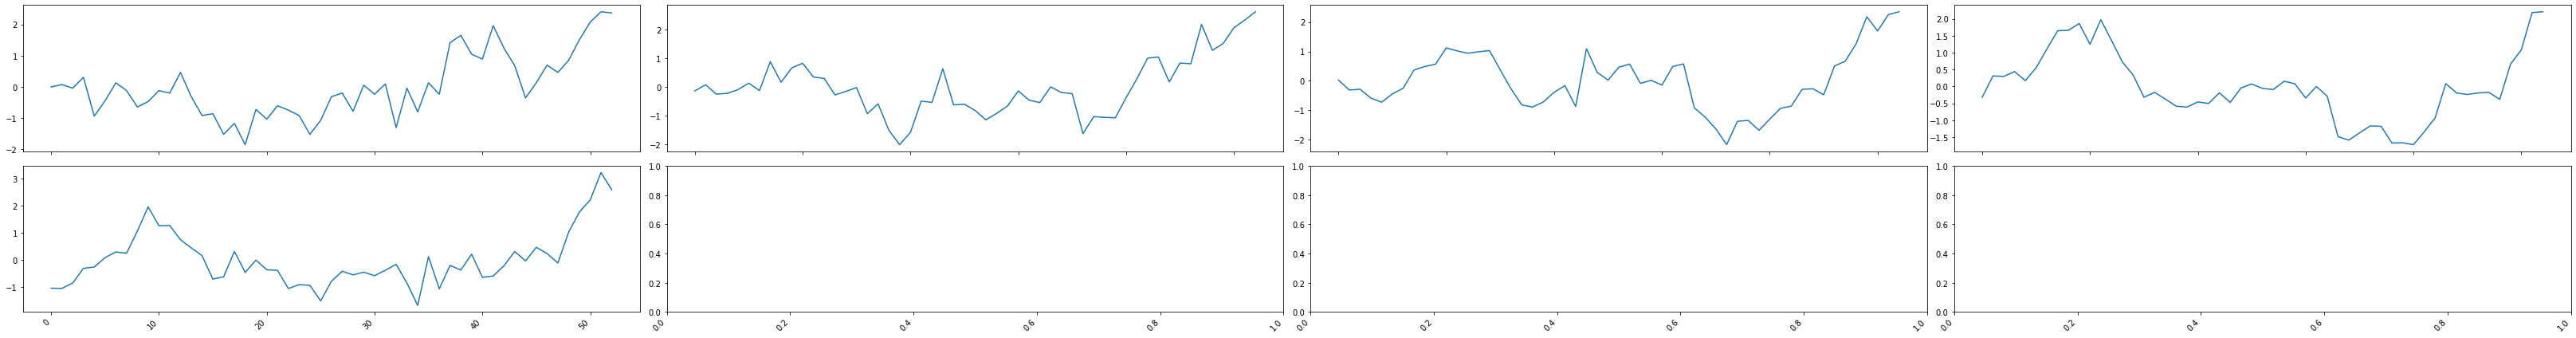

In [48]:
for cluster in range(len(ts_clustered)):
    print(f"==========Cluster number: {cluster}==========")
    plot_cluster_ts(ts_clustered[cluster])

A maioria das séries dentro do seu cluster são parecidas, o que é ótimo.

---

### 5. [Mapeamento de Clusters](https://www.kaggle.com/code/izzettunc/introduction-to-time-series-clustering/notebook)

Bem, nós agrupamos nossas séries, mas como sabemos qual série pertence a qual cluster? Não é esse o propósito do agrupamento?

Como podemos ver nas ilustrações, cada nó (ou múltiplos de nós em alguns casos) representa um cluster. Portanto, podemos descobrir qual série pertence a qual cluster verificando o nó vencedor de cada série.

In [49]:
# Supondo que series_df.index são os nomes das UFs
ufs = series_df.index.to_list()

# Cria um DataFrame com UF e cluster
cluster_df = pd.DataFrame({
    'UF': ufs,
    'cluster': cluster_labels
})

# Para pegar as UFs de cada cluster
clusters = {}
for cluster_id in np.unique(cluster_labels):
    clusters[cluster_id] = cluster_df.loc[cluster_df['cluster'] == cluster_id, 'UF'].to_list()

# Exemplo de impressão
for cluster_id, uf_list in clusters.items():
    print(f"Cluster {cluster_id}: {uf_list}")


Cluster 0: ['Alagoas', 'Amapá', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná', 'Paraíba', 'Pará', 'Piauí', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Tocantins']
Cluster 1: ['Acre', 'Amazonas', 'Bahia', 'Pernambuco', 'Sergipe']


In [50]:
cluster_labels

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0], dtype=int64)

C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


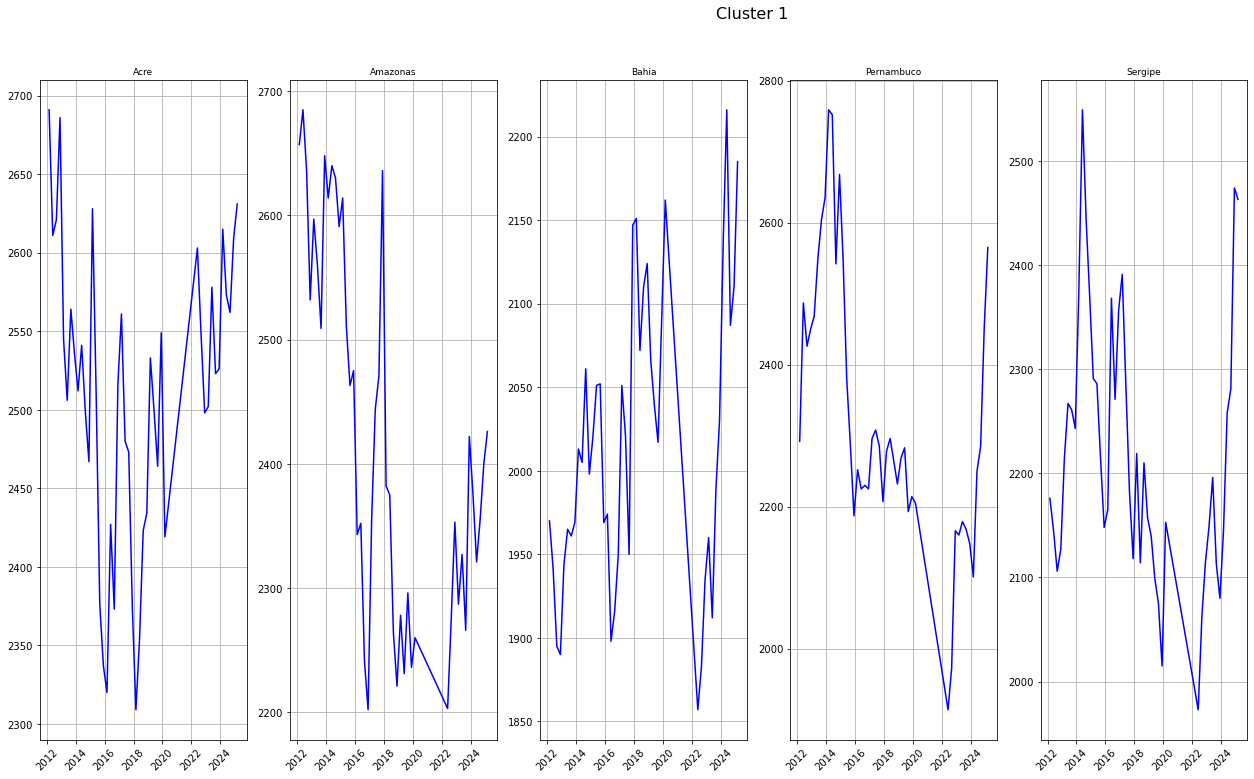

In [51]:
plot_series(renda[renda.uf.isin(['Acre', 'Amazonas', 'Bahia', 'Pernambuco', 'Sergipe'])], 'Cluster 1')

C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


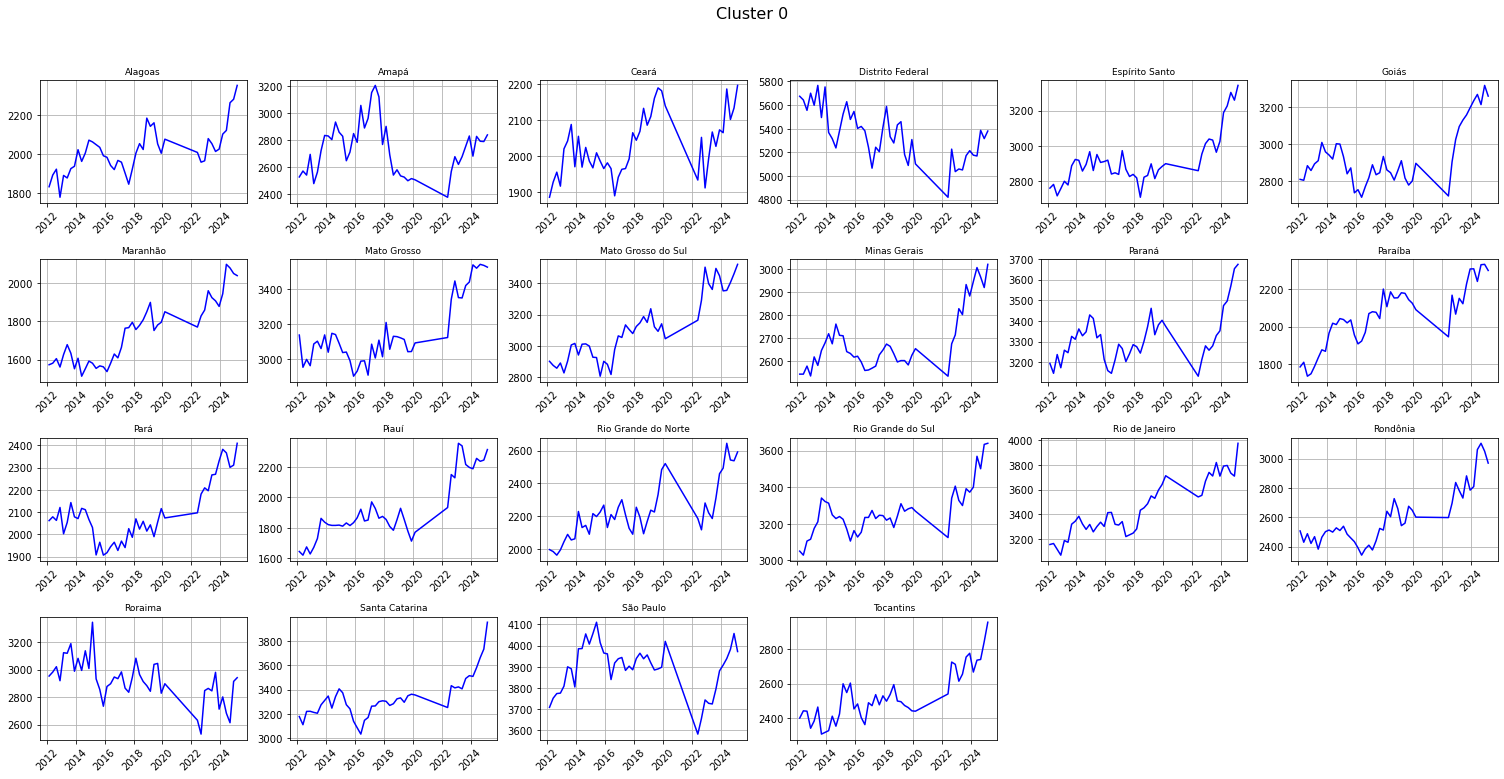

In [52]:
plot_series(renda[~renda.uf.isin(['Acre', 'Amazonas', 'Bahia', 'Pernambuco', 'Sergipe'])], 'Cluster 0')

# APLICAÇÃO 3: OCUPAÇÂO

---

### 1. Create the main feature matrix:


In [53]:
series_df = ocup.pivot(index='uf', columns='data', values='valor')
series_df = series_df.dropna(axis='columns')
series_df.head()

data      2012-03-01  2012-06-01  2012-09-01  2012-12-01  2013-03-01  \
uf                                                                     
Acre           284.0       299.0       299.0       305.0       294.0   
Alagoas       1041.0      1020.0      1068.0      1105.0      1093.0   
Amapá          278.0       269.0       283.0       289.0       281.0   
Amazonas      1386.0      1416.0      1419.0      1472.0      1454.0   
Bahia         6086.0      6121.0      6206.0      6104.0      5891.0   

data      2013-06-01  2013-09-01  2013-12-01  2014-03-01  2014-06-01  ...  \
uf                                                                    ...   
Acre           296.0       299.0       303.0       303.0       300.0  ...   
Alagoas       1112.0      1126.0      1128.0      1115.0      1112.0  ...   
Amapá          278.0       293.0       304.0       300.0       307.0  ...   
Amazonas      1465.0      1471.0      1507.0      1452.0      1487.0  ...   
Bahia         5987.0      6091.0      6332.0      6205.0      6296.0  ...   

data      2022-12-01  2023-03-01  2023-06-01  2023-09-01  2023-12-01  \
uf                                                                     
Acre           318.0       298.0       299.0       319.0       313.0   
Alagoas       1248.0      1199.0      1220.0      1236.0      1251.0   
Amapá          373.0       374.0       381.0       385.0       375.0   
Amazonas      1761.0      1703.0      1747.0      1770.0      1791.0   
Bahia         6052.0      5893.0      6032.0      6138.0      6128.0   

data      2024-03-01  2024-06-01  2024-09-01  2024-12-01  2025-03-01  
uf                                                                    
Acre           311.0       330.0       339.0       340.0       336.0  
Alagoas       1231.0      1274.0      1276.0      1305.0      1251.0  
Amapá          386.0       389.0       377.0       378.0       374.0  
Amazonas      1741.0      1792.0      1845.0      1837.0      1843.0  
Bahia         6038.0      6159.0      6344.0      6522.0      6364.0  

[5 rows x 53 columns]

---

### 2 Time Series Scaling

Scaling must be applied to each series independently

In [54]:
# Scaling
scaler = StandardScaler()

# First transposition - to have series in columns (allows scaling each series independently)
# Second Transposition - come back to initial feature matrix shape (n_series x time_observations)
scaler = StandardScaler()
scaled_ts = scaler.fit_transform(series_df.T).T 

In [55]:
scaled_ts

array([[-1.58324182, -0.57225608, -0.57225608, ...,  2.12370589,
         2.19110494,  1.92150875],
       [-0.61130743, -0.8241939 , -0.33759625, ...,  1.77099357,
         2.06497966,  1.5175573 ],
       [-1.24361144, -1.50562674, -1.09804738, ...,  1.63855694,
         1.66766975,  1.55121851],
       ...,
       [-1.27764329, -1.00600681, -0.59855209, ...,  2.19542316,
         2.04020231,  1.3417085 ],
       [-1.20692427, -0.9693066 , -0.76177688, ...,  1.93919545,
         2.16215489,  2.1012075 ],
       [-0.92046813, -0.82405546, -0.82405546, ...,  2.18080608,
         2.27721875,  2.11653097]])

---

### 3 Time Series K-Means¶

**Ao usar o agrupamento K-Means, é melhor usar a Abordagem Baseada em Características**. Extraímos um conjunto de características da série e esperamos que elas descrevam bem a série temporal, para então realizar o agrupamento. Gostaria de demonstrar uma solução pronta para uso (Abordagem de Dados Brutos). Para a Abordagem Baseada em Características, você precisa obter características para cada série e agrupá-las usando qualquer algoritmo de agrupamento. Estas bibliotecas podem ajudar:

- ts_fel

- ts_fresh

É importante como definimos a similaridade entre observações em um espaço de características. Ao usar o KMeans, podemos usar:

- Distância Euclidiana

- Correspondência Dinâmica de Distorção Temporal (DTW)

> Ao usar a Correspondência Dinâmica de Distorção Temporal, a abordagem baseada em características não é adequada, pois estamos tentando determinar uma medida da similaridade da série (como elas se sobrepõem, tamanho/similaridade/localização dos picos...).

> Para DTW, é melhor reduzir a amostragem da série usando reamostragem (ou seja, alterar a frequência da série). Por exemplo, em vez de observações/ticks de minutos, considere observações de 5/10/15 minutos, mas devemos ter em mente que os principais padrões (picos, flutuações) se enquadram nesse intervalo. Isso permite manter a estrutura da série, tornando-a mais curta e, portanto, muito mais rápida para identificar séries semelhantes com DTW.

Primeiro, aplique o algoritmo KMeans da biblioteca ts_learn.

In [56]:
# Run KMeans and plot the results 
def get_kmeans_results(data, max_clusters=10, metric='euclidean', seed=23):
    """
    Runs KMeans n times (according to max_cluster range)

    data: pd.DataFrame or np.array
        Time Series Data
    max_clusters: int
        Number of different clusters for KMeans algorithm
    metric: str
        Distance metric between the observations
    seed: int
        random seed
    Returns: 
    -------
    None      
    """
    # Main metrics
    distortions = []
    silhouette = []
    clusters_range = range(1, max_clusters+1)
    
    for K in tqdm(clusters_range):
        kmeans_model = TimeSeriesKMeans(n_clusters=K, metric=metric, n_jobs=-1, max_iter=10, random_state=seed)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
        if K > 1:
            silhouette.append(silhouette_score(data, kmeans_model.labels_))
        
    # Visualization
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range[1:], silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette');

**Let's try finding similar series using DTW metric:**

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be rem


CPU times: total: 4.59 s
Wall time: 4.87 s


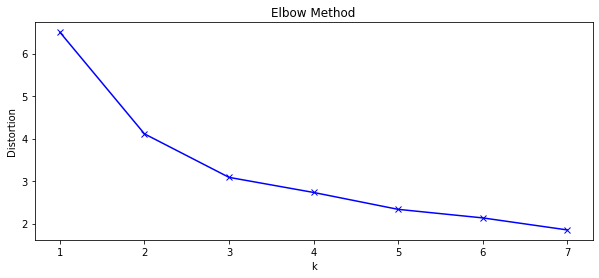

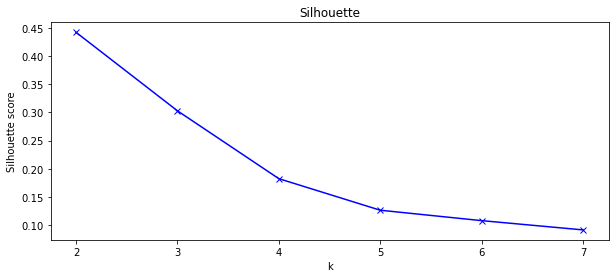

In [57]:
%%time

# Run the algorithm using DTW algorithm 
get_kmeans_results(data=scaled_ts, max_clusters=7, metric='dtw', seed=SEED)

In [58]:
# Visualization for obtained clusters   
def plot_clusters(data, cluster_model, dim_red_algo):
    """
    Plots clusters obtained by clustering model 

    data: pd.DataFrame or np.array
        Time Series Data
    cluster_model: Class
        Clustering algorithm 
    dim_red_algo: Class
        Dimensionality reduction algorithm (e.g. TSNE/PCA/MDS...) 
    Returns:
    -------
    None
    """
    cluster_labels = cluster_model.fit_predict(data)
    centroids = cluster_model.cluster_centers_
    u_labels = np.unique(cluster_labels)
    
    # Centroids Visualization
    plt.figure(figsize=(16, 10))
    plt.scatter(centroids[:, 0] , centroids[:, 1] , s=150, color='r', marker="x")
    
    # Downsize the data into 2D
    if data.shape[1] > 2:
        data_2d = dim_red_algo.fit_transform(data)
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)
    else:
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)

    plt.title('Clustered Data')
    plt.xlabel("Feature space for the 1st feature")
    plt.ylabel("Feature space for the 2nd feature")
    plt.grid(True)
    plt.legend(title='Cluster Labels');

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CPU times: total: 1.12 s
Wall time: 845 ms


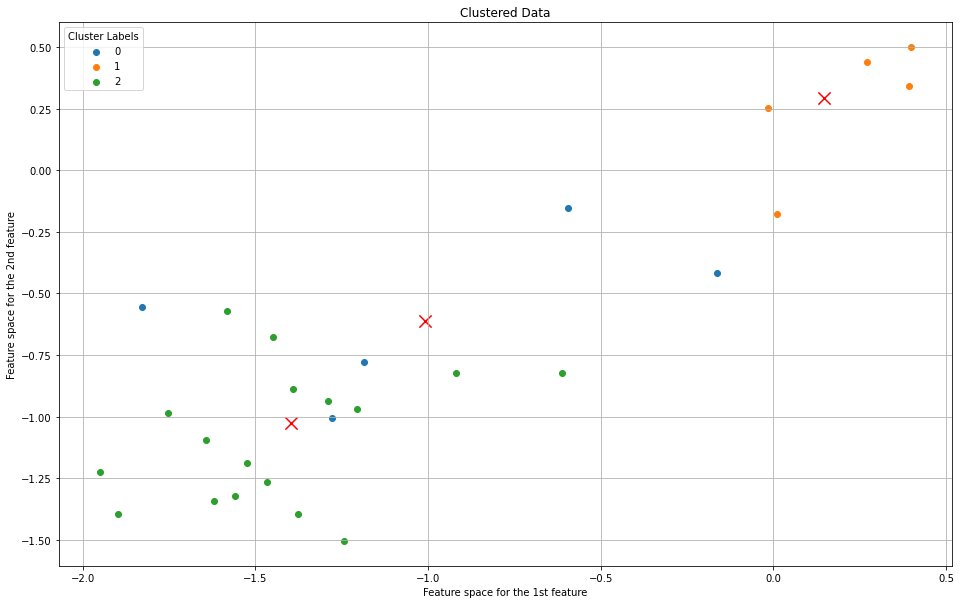

In [59]:
%%time

# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=3, metric='dtw', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=scaled_ts,
              cluster_model=model,
              dim_red_algo=TSNE(n_components=2, perplexity=min(5, scaled_ts.shape[0] - 1), init='pca', random_state=SEED))

**MultiDimensional Scaling (MDS):**

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be rem

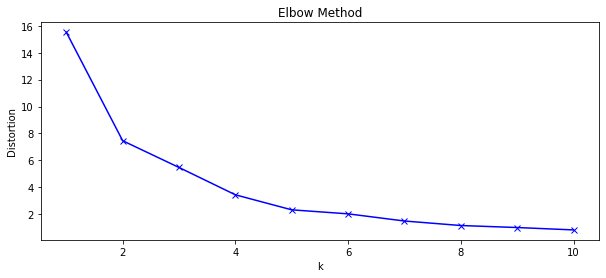

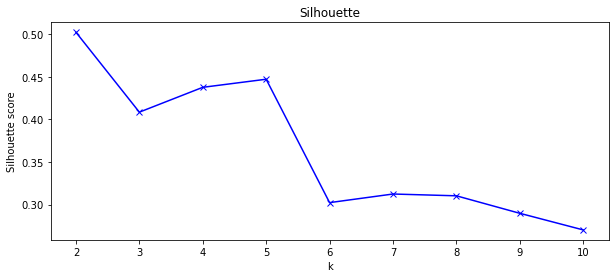

In [60]:
mds = MDS(n_components=2, n_init=3, max_iter=100, random_state=SEED)
data_mds = mds.fit_transform(scaled_ts) 

get_kmeans_results(data=data_mds, max_clusters=10, metric='euclidean', seed=SEED)

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


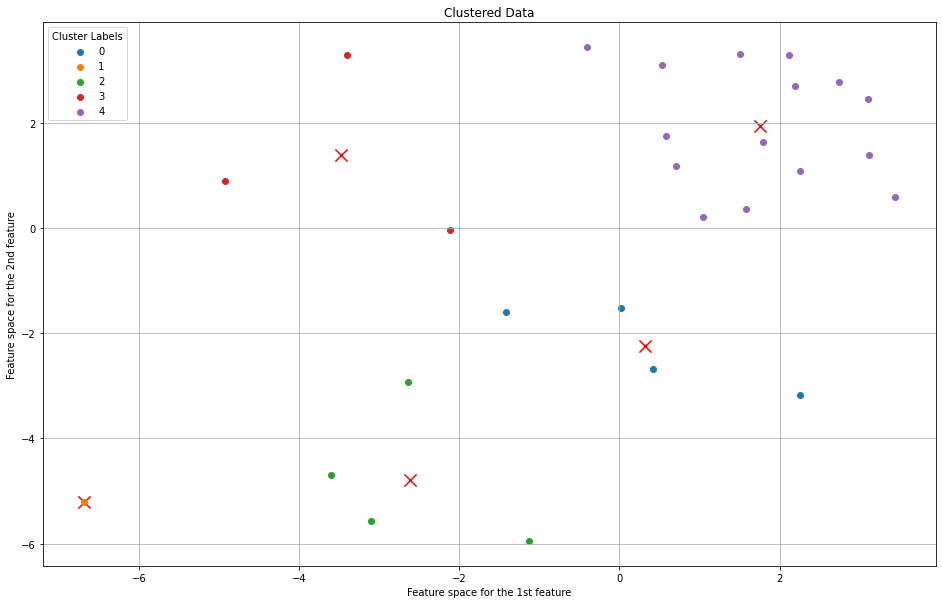

In [61]:
# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=5, metric='euclidean', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=data_mds,
              cluster_model=model,
              dim_red_algo=TSNE(n_components=2, init='pca', random_state=SEED))

---

### 4 Time Series KMeans Results¶

Por fim, escolheremos TimeSeriesKMeans com recursos reduzidos usando MDS e 2 clusters. 

In [62]:
# Train TimeSeriesKMeans with MDS
cluster_labels = model.fit_predict(data_mds)

ts_clustered = [ scaled_ts[(cluster_labels == lable), :] for lable in np.unique(cluster_labels)]

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


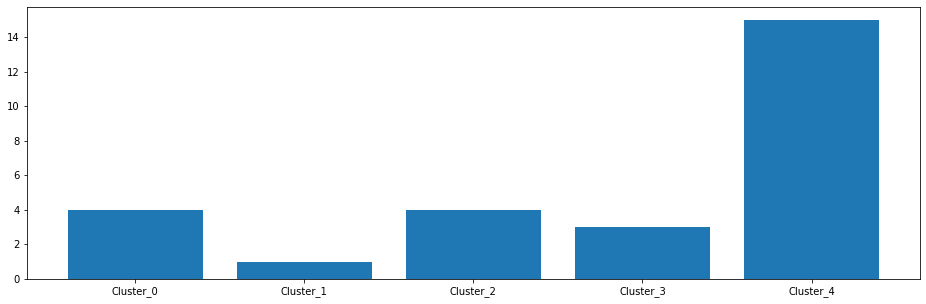

In [63]:
# Objects distribution in the obtained clusters 
labels = [f'Cluster_{i}' for i in range(len(ts_clustered))]
samples_in_cluster = [val.shape[0] for val in ts_clustered]

plt.figure(figsize=(16,5))
plt.bar(labels, samples_in_cluster);

In [64]:
def plot_cluster_ts(current_cluster):
    """
    Plots time series in a cluster 

    current_cluster: np.array
        Cluster with time series 
    Returns:
    -------
    None 
    """
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),4,
        figsize=(45, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)
    for indx, series in enumerate(current_cluster):
        ax[indx].plot(series)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show();

Let's have a look at the obtained clusters

==========Cluster number: 0==========


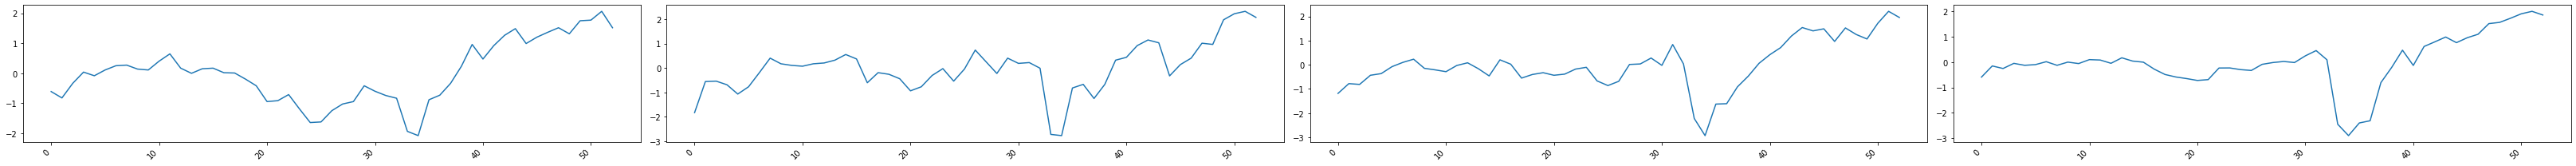

==========Cluster number: 1==========


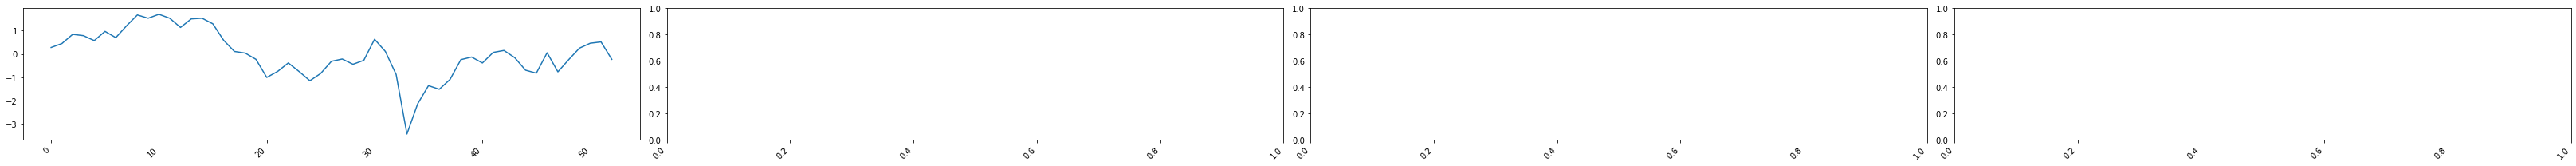

==========Cluster number: 2==========


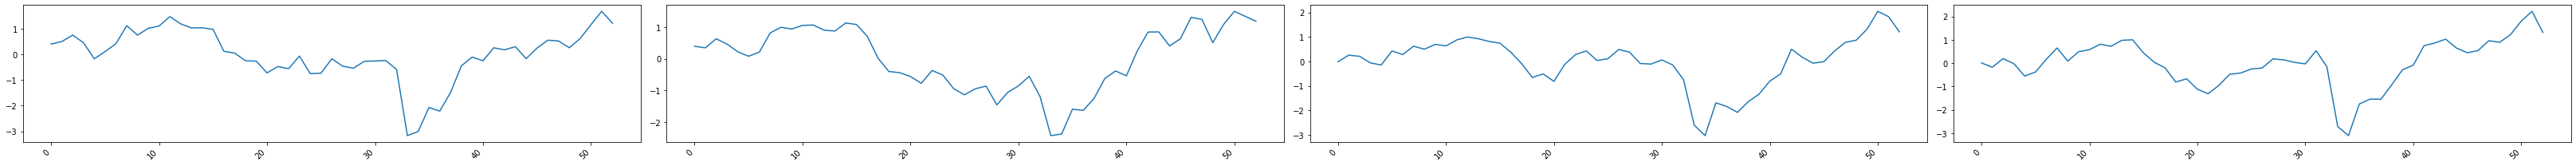

==========Cluster number: 3==========


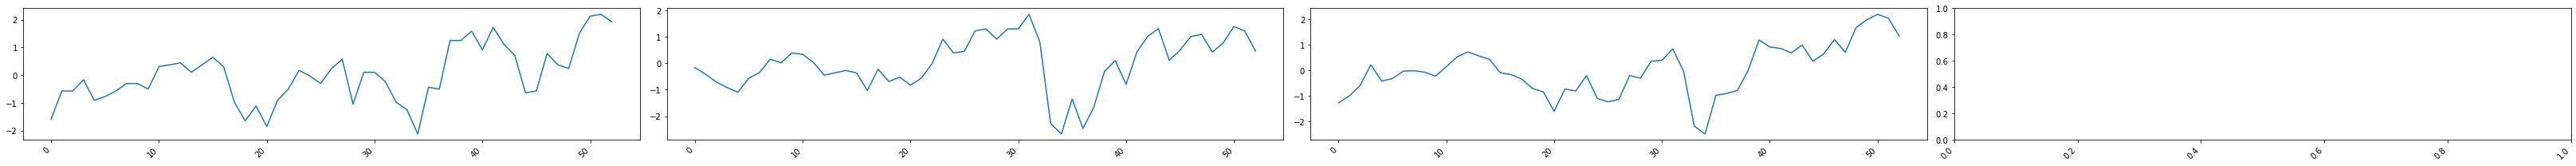

==========Cluster number: 4==========


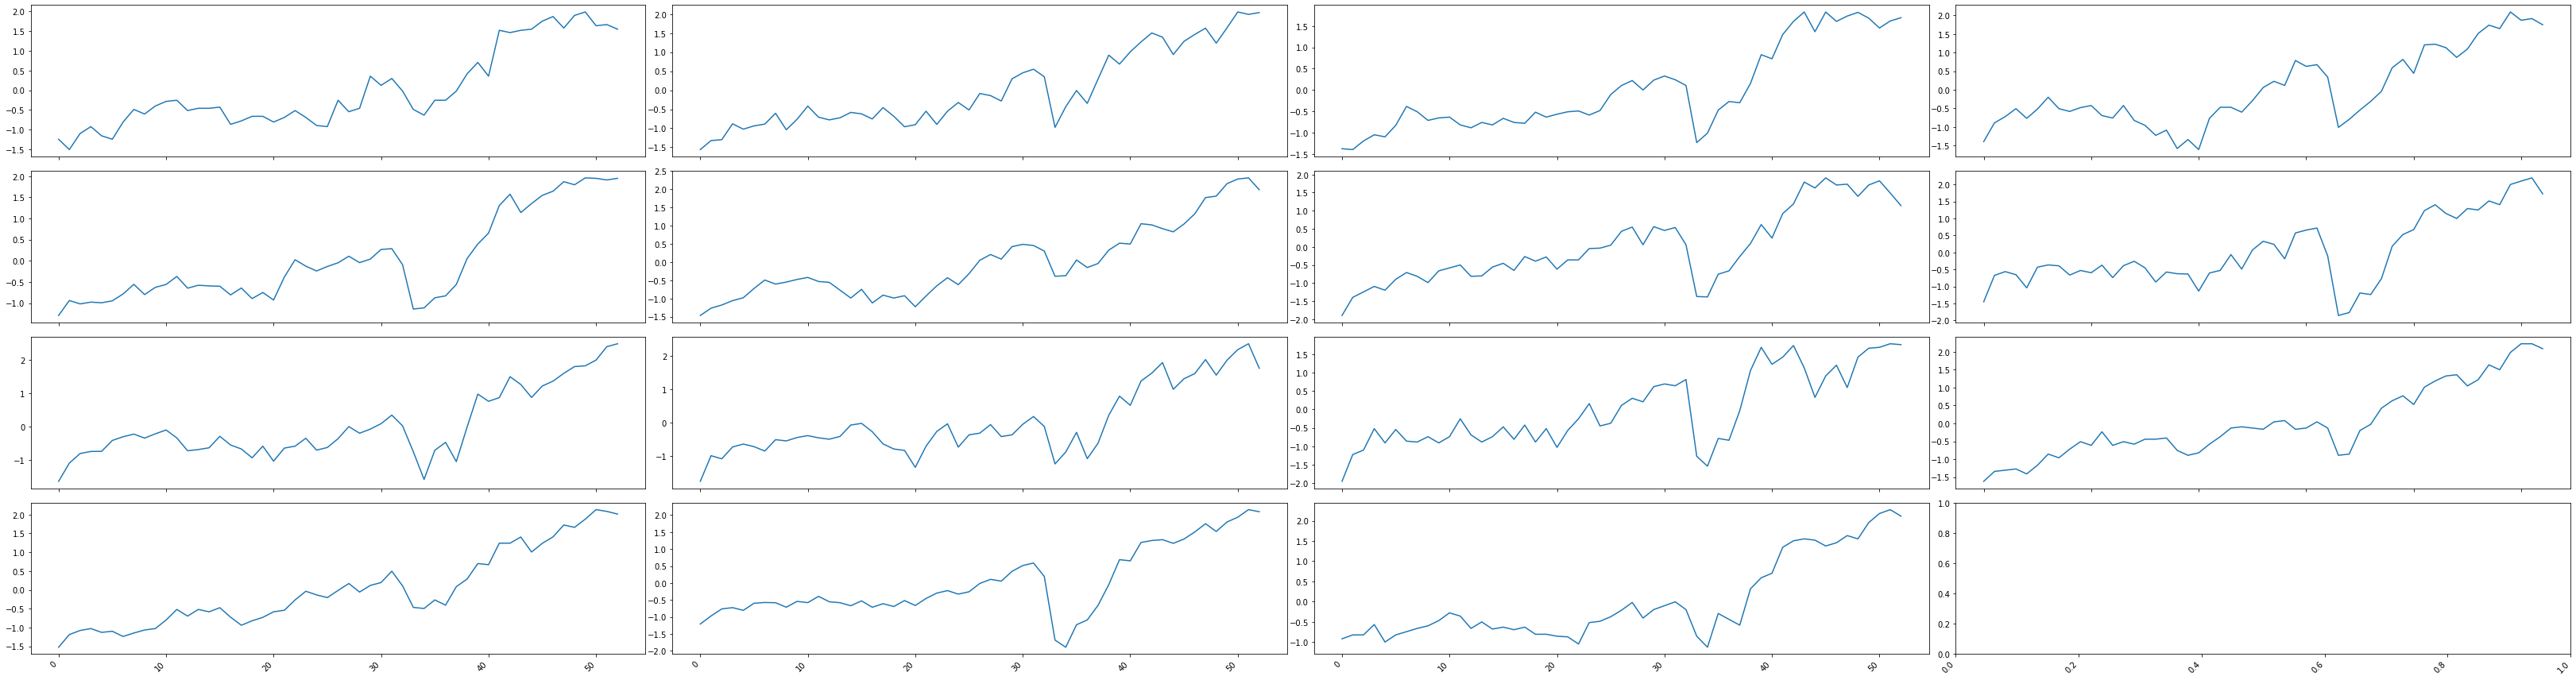

In [65]:
for cluster in range(len(ts_clustered)):
    print(f"==========Cluster number: {cluster}==========")
    plot_cluster_ts(ts_clustered[cluster])

A maioria das séries dentro do seu cluster são parecidas, o que é ótimo.

---

### 5. [Mapeamento de Clusters](https://www.kaggle.com/code/izzettunc/introduction-to-time-series-clustering/notebook)

Bem, nós agrupamos nossas séries, mas como sabemos qual série pertence a qual cluster? Não é esse o propósito do agrupamento?

Como podemos ver nas ilustrações, cada nó (ou múltiplos de nós em alguns casos) representa um cluster. Portanto, podemos descobrir qual série pertence a qual cluster verificando o nó vencedor de cada série.

In [66]:
# Supondo que series_df.index são os nomes das UFs
ufs = series_df.index.to_list()

# Cria um DataFrame com UF e cluster
cluster_df = pd.DataFrame({
    'UF': ufs,
    'cluster': cluster_labels
})

# Para pegar as UFs de cada cluster
clusters = {}
for cluster_id in np.unique(cluster_labels):
    clusters[cluster_id] = cluster_df.loc[cluster_df['cluster'] == cluster_id, 'UF'].to_list()

# Exemplo de impressão
for cluster_id, uf_list in clusters.items():
    print(f"Cluster {cluster_id}: {uf_list}")


Cluster 0: ['Alagoas', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rio de Janeiro']
Cluster 1: ['Piauí']
Cluster 2: ['Bahia', 'Maranhão', 'Paraíba', 'Pernambuco']
Cluster 3: ['Acre', 'Ceará', 'Sergipe']
Cluster 4: ['Amapá', 'Amazonas', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná', 'Pará', 'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Tocantins']


C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


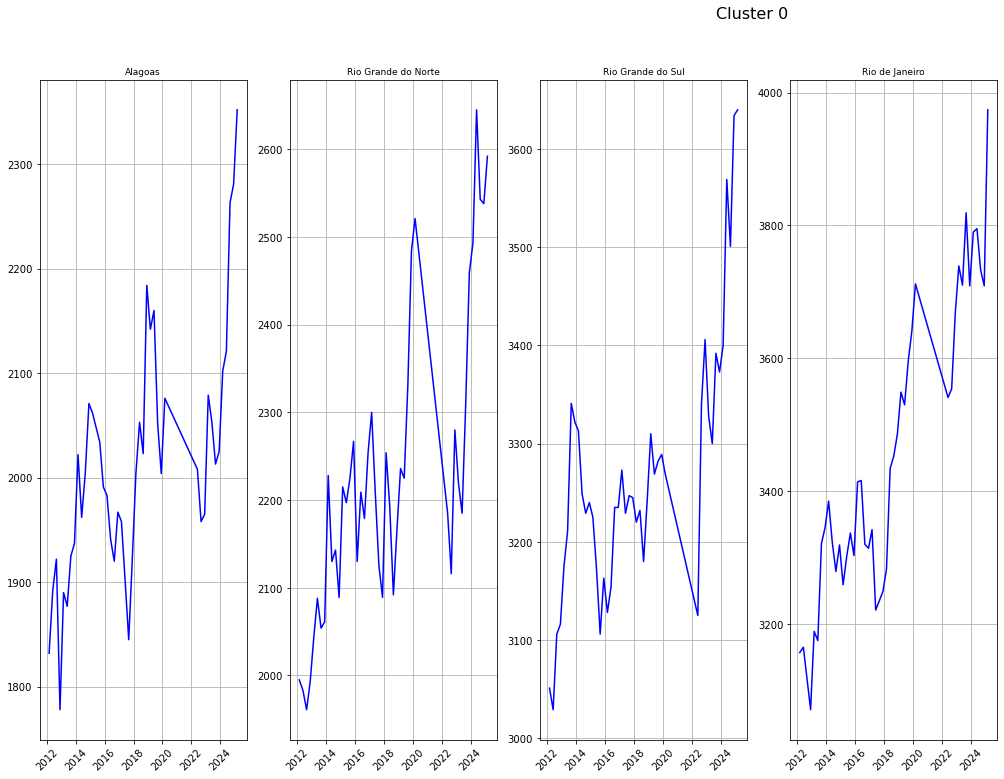

In [67]:
plot_series(renda[renda.uf.isin(['Alagoas', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rio de Janeiro'])], 'Cluster 0')

C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


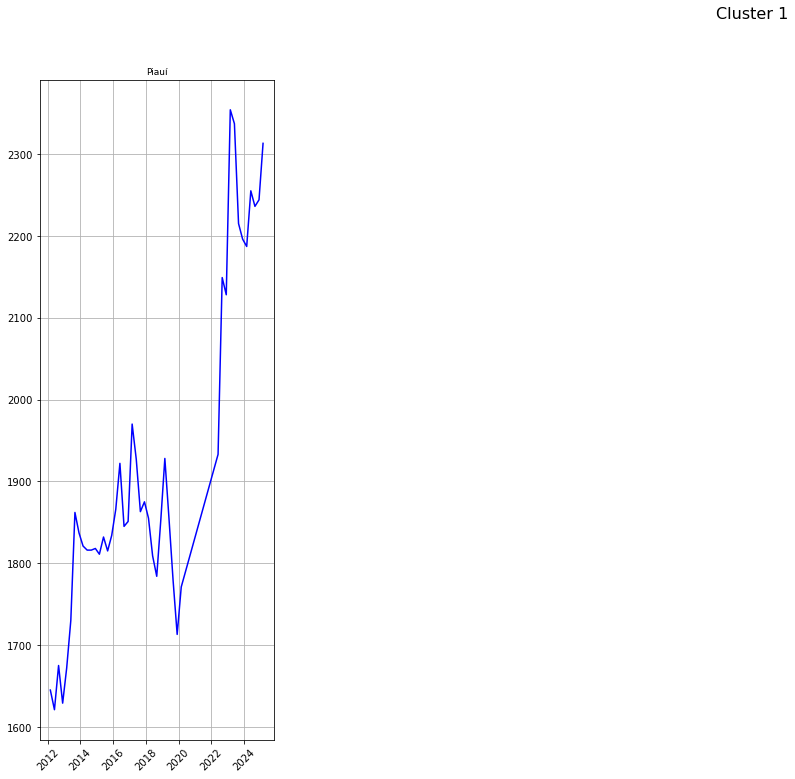

In [68]:
plot_series(renda[renda.uf.isin(['Piauí'])], 'Cluster 1')

C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


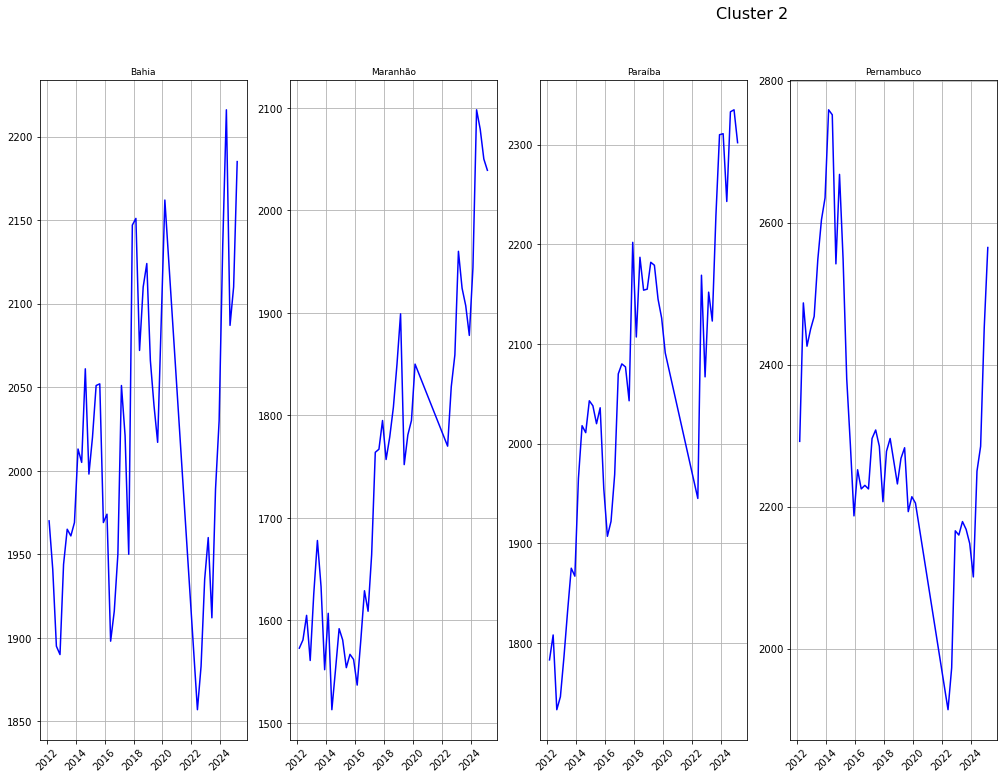

In [69]:
plot_series(renda[renda.uf.isin(['Bahia', 'Maranhão', 'Paraíba', 'Pernambuco'])], 'Cluster 2')

C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


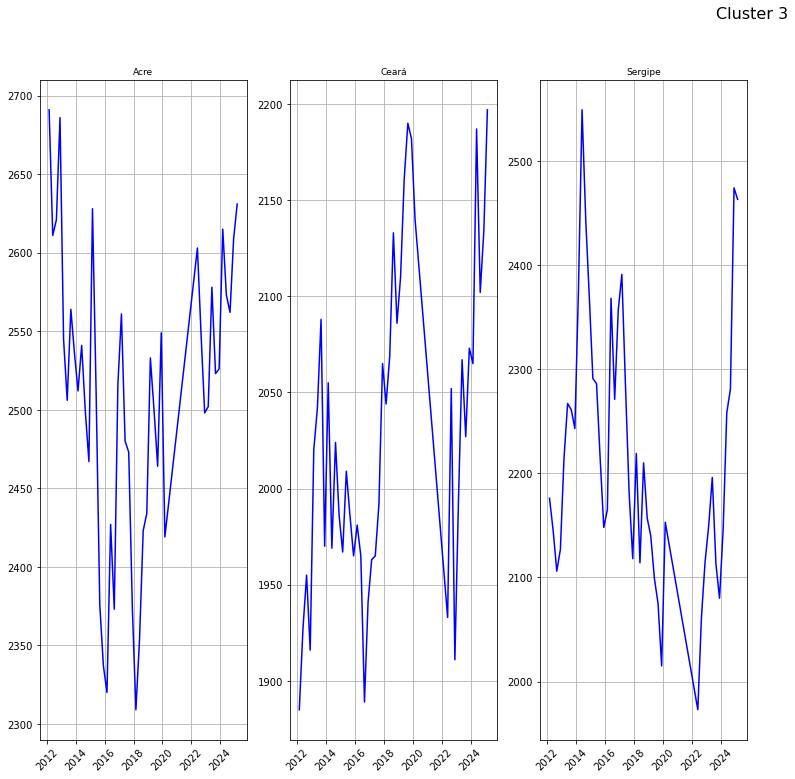

In [70]:
plot_series(renda[renda.uf.isin(['Acre', 'Ceará', 'Sergipe'])], 'Cluster 3')

C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


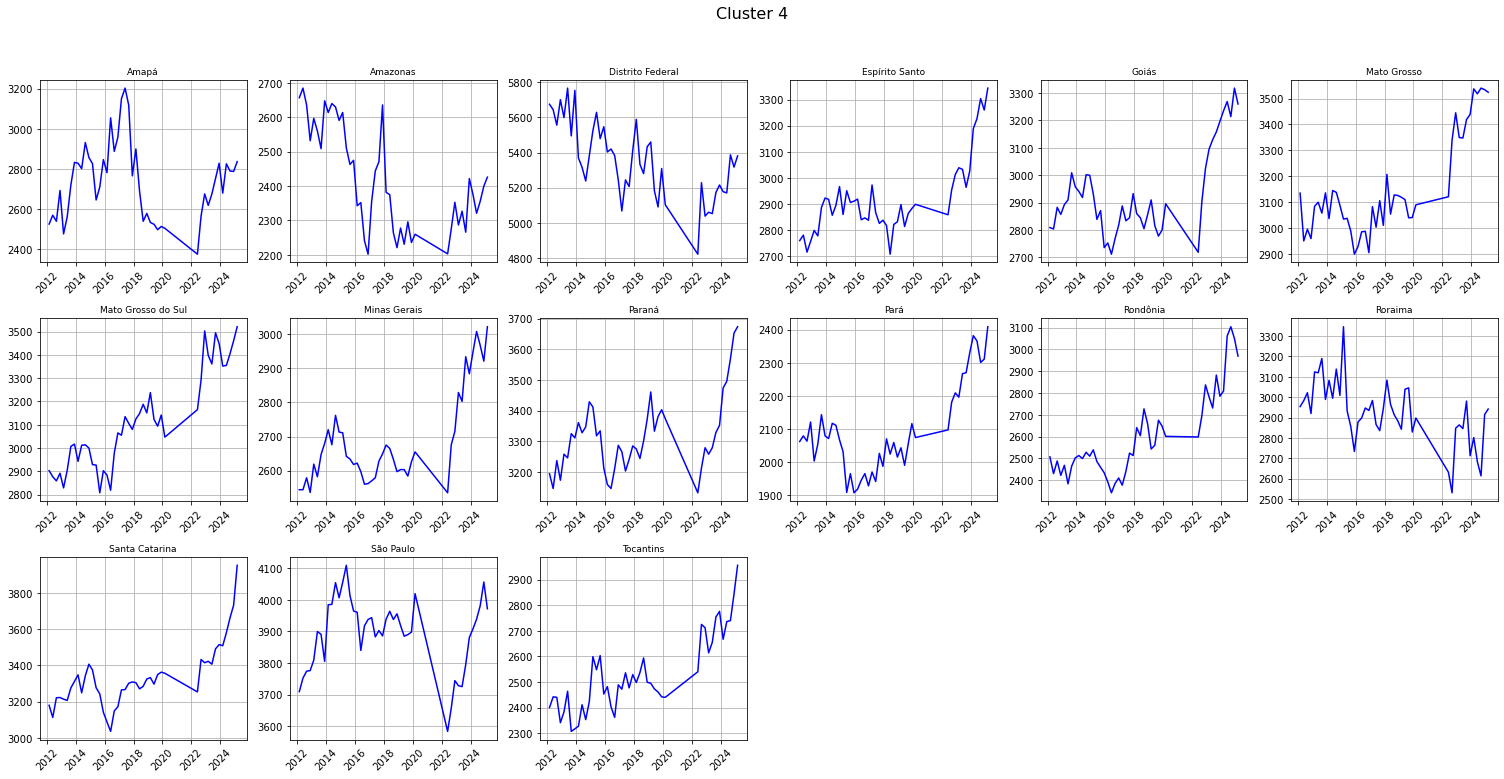

In [71]:
plot_series(renda[renda.uf.isin(['Amapá', 'Amazonas', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná', 'Pará', 'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Tocantins'])], 'Cluster 4')

# APLICAÇÃO 3: PEA

---

### 1. Create the main feature matrix:


In [72]:
series_df = pea.pivot(index='uf', columns='data', values='valor')
series_df = series_df.dropna(axis='columns')
series_df.head()

data      2012-03-01  2012-06-01  2012-09-01  2012-12-01  2013-03-01  \
uf                                                                     
Acre           313.0       329.0       325.0       332.0       330.0   
Alagoas       1173.0      1155.0      1208.0      1243.0      1245.0   
Amapá          318.0       315.0       329.0       329.0       317.0   
Amazonas      1558.0      1557.0      1567.0      1605.0      1622.0   
Bahia         6888.0      6908.0      6957.0      6847.0      6805.0   

data      2013-06-01  2013-09-01  2013-12-01  2014-03-01  2014-06-01  ...  \
uf                                                                    ...   
Acre           328.0       328.0       326.0       330.0       332.0  ...   
Alagoas       1246.0      1258.0      1245.0      1236.0      1232.0  ...   
Amapá          325.0       329.0       335.0       338.0       341.0  ...   
Amazonas      1633.0      1606.0      1633.0      1584.0      1623.0  ...   
Bahia         6794.0      6825.0      6965.0      7025.0      7009.0  ...   

data      2022-12-01  2023-03-01  2023-06-01  2023-09-01  2023-12-01  \
uf                                                                     
Acre           354.0       331.0       329.0       340.0       335.0   
Alagoas       1376.0      1341.0      1351.0      1358.0      1374.0   
Amapá          431.0       426.0       434.0       441.0       437.0   
Amazonas      1957.0      1903.0      1934.0      1957.0      1964.0   
Bahia         6997.0      6887.0      6963.0      7081.0      7016.0   

data      2024-03-01  2024-06-01  2024-09-01  2024-12-01  2025-03-01  
uf                                                                    
Acre           341.0       356.0       366.0       367.0       366.0  
Alagoas       1366.0      1387.0      1383.0      1420.0      1374.0  
Amapá          433.0       428.0       411.0       414.0       410.0  
Amazonas      1930.0      1947.0      2008.0      2004.0      2049.0  
Bahia         7023.0      6929.0      7025.0      7242.0      7144.0  

[5 rows x 53 columns]

---

### 2 Time Series Scaling

Scaling must be applied to each series independently

In [73]:
# Scaling
scaler = StandardScaler()

# First transposition - to have series in columns (allows scaling each series independently)
# Second Transposition - come back to initial feature matrix shape (n_series x time_observations)
scaler = StandardScaler()
scaled_ts = scaler.fit_transform(series_df.T).T 

In [74]:
scaled_ts

array([[-1.94526141, -1.0138206 , -1.2466808 , ...,  1.14013627,
         1.19835132,  1.14013627],
       [-1.22775514, -1.46281001, -0.77070401, ...,  1.51455165,
         1.99771999,  1.39702421],
       [-1.52471452, -1.60748325, -1.22122918, ...,  1.04111609,
         1.12388482,  1.01352652],
       ...,
       [-2.25805848, -1.79513362, -1.35425279, ...,  1.57760468,
         1.42329639,  0.73993112],
       [-1.84582372, -1.63682002, -1.52053226, ...,  1.23108779,
         1.44637731,  1.45266313],
       [-1.22057397, -1.18453474, -1.2566132 , ...,  2.02295686,
         2.13107455,  2.16711378]])

---

### 3 Time Series K-Means¶

**Ao usar o agrupamento K-Means, é melhor usar a Abordagem Baseada em Características**. Extraímos um conjunto de características da série e esperamos que elas descrevam bem a série temporal, para então realizar o agrupamento. Gostaria de demonstrar uma solução pronta para uso (Abordagem de Dados Brutos). Para a Abordagem Baseada em Características, você precisa obter características para cada série e agrupá-las usando qualquer algoritmo de agrupamento. Estas bibliotecas podem ajudar:

- ts_fel

- ts_fresh

É importante como definimos a similaridade entre observações em um espaço de características. Ao usar o KMeans, podemos usar:

- Distância Euclidiana

- Correspondência Dinâmica de Distorção Temporal (DTW)

> Ao usar a Correspondência Dinâmica de Distorção Temporal, a abordagem baseada em características não é adequada, pois estamos tentando determinar uma medida da similaridade da série (como elas se sobrepõem, tamanho/similaridade/localização dos picos...).

> Para DTW, é melhor reduzir a amostragem da série usando reamostragem (ou seja, alterar a frequência da série). Por exemplo, em vez de observações/ticks de minutos, considere observações de 5/10/15 minutos, mas devemos ter em mente que os principais padrões (picos, flutuações) se enquadram nesse intervalo. Isso permite manter a estrutura da série, tornando-a mais curta e, portanto, muito mais rápida para identificar séries semelhantes com DTW.

Primeiro, aplique o algoritmo KMeans da biblioteca ts_learn.

In [75]:
# Run KMeans and plot the results 
def get_kmeans_results(data, max_clusters=10, metric='euclidean', seed=23):
    """
    Runs KMeans n times (according to max_cluster range)

    data: pd.DataFrame or np.array
        Time Series Data
    max_clusters: int
        Number of different clusters for KMeans algorithm
    metric: str
        Distance metric between the observations
    seed: int
        random seed
    Returns: 
    -------
    None      
    """
    # Main metrics
    distortions = []
    silhouette = []
    clusters_range = range(1, max_clusters+1)
    
    for K in tqdm(clusters_range):
        kmeans_model = TimeSeriesKMeans(n_clusters=K, metric=metric, n_jobs=-1, max_iter=10, random_state=seed)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
        if K > 1:
            silhouette.append(silhouette_score(data, kmeans_model.labels_))
        
    # Visualization
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range[1:], silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette');

**Let's try finding similar series using DTW metric:**

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be rem


CPU times: total: 5.33 s
Wall time: 5.65 s


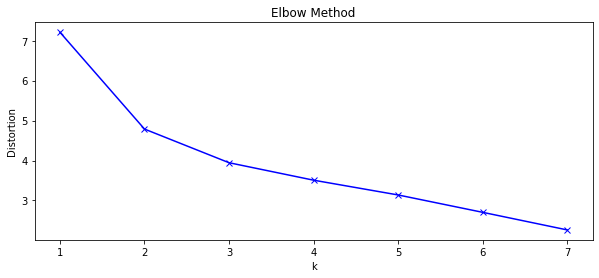

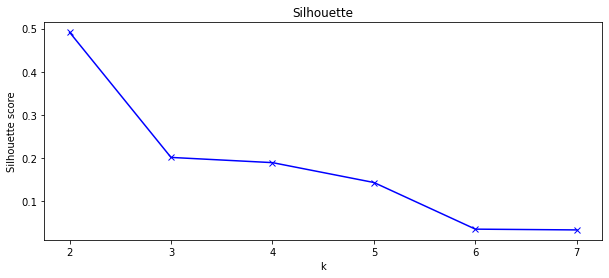

In [76]:
%%time

# Run the algorithm using DTW algorithm 
get_kmeans_results(data=scaled_ts, max_clusters=7, metric='dtw', seed=SEED)

In [77]:
# Visualization for obtained clusters   
def plot_clusters(data, cluster_model, dim_red_algo):
    """
    Plots clusters obtained by clustering model 

    data: pd.DataFrame or np.array
        Time Series Data
    cluster_model: Class
        Clustering algorithm 
    dim_red_algo: Class
        Dimensionality reduction algorithm (e.g. TSNE/PCA/MDS...) 
    Returns:
    -------
    None
    """
    cluster_labels = cluster_model.fit_predict(data)
    centroids = cluster_model.cluster_centers_
    u_labels = np.unique(cluster_labels)
    
    # Centroids Visualization
    plt.figure(figsize=(16, 10))
    plt.scatter(centroids[:, 0] , centroids[:, 1] , s=150, color='r', marker="x")
    
    # Downsize the data into 2D
    if data.shape[1] > 2:
        data_2d = dim_red_algo.fit_transform(data)
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)
    else:
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)

    plt.title('Clustered Data')
    plt.xlabel("Feature space for the 1st feature")
    plt.ylabel("Feature space for the 2nd feature")
    plt.grid(True)
    plt.legend(title='Cluster Labels');

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CPU times: total: 953 ms
Wall time: 770 ms


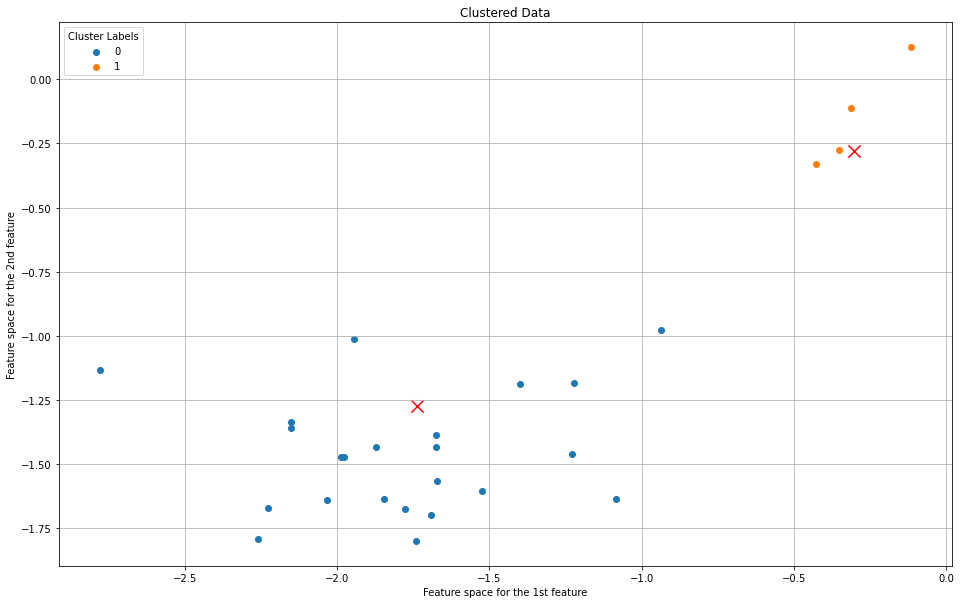

In [78]:
%%time

# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=2, metric='dtw', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=scaled_ts,
              cluster_model=model,
              dim_red_algo=TSNE(n_components=2, perplexity=min(5, scaled_ts.shape[0] - 1), init='pca', random_state=SEED))

**MultiDimensional Scaling (MDS):**

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be rem

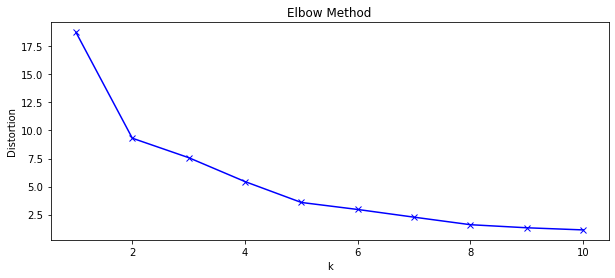

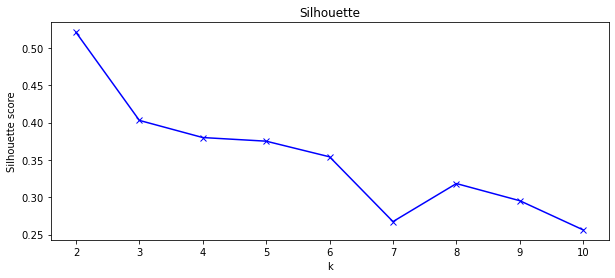

In [79]:
mds = MDS(n_components=2, n_init=3, max_iter=100, random_state=SEED)
data_mds = mds.fit_transform(scaled_ts) 

get_kmeans_results(data=data_mds, max_clusters=10, metric='euclidean', seed=SEED)

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


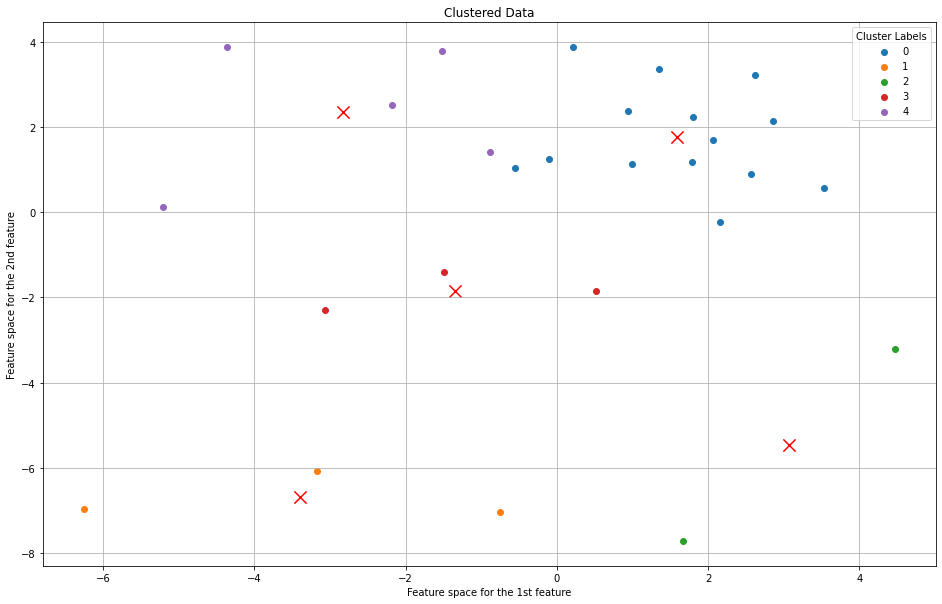

In [80]:
# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=5, metric='euclidean', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=data_mds,
              cluster_model=model,
              dim_red_algo=TSNE(n_components=2, init='pca', random_state=SEED))

---

### 4 Time Series KMeans Results¶

Por fim, escolheremos TimeSeriesKMeans com recursos reduzidos usando MDS e 2 clusters. 

In [81]:
# Train TimeSeriesKMeans with MDS
cluster_labels = model.fit_predict(data_mds)

ts_clustered = [ scaled_ts[(cluster_labels == lable), :] for lable in np.unique(cluster_labels)]

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


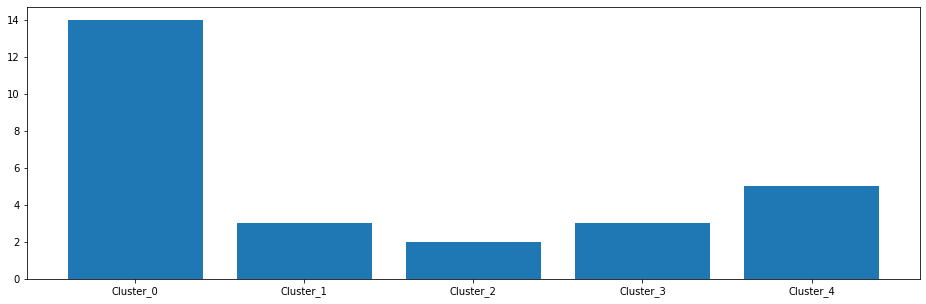

In [82]:
# Objects distribution in the obtained clusters 
labels = [f'Cluster_{i}' for i in range(len(ts_clustered))]
samples_in_cluster = [val.shape[0] for val in ts_clustered]

plt.figure(figsize=(16,5))
plt.bar(labels, samples_in_cluster);

In [83]:
def plot_cluster_ts(current_cluster):
    """
    Plots time series in a cluster 

    current_cluster: np.array
        Cluster with time series 
    Returns:
    -------
    None 
    """
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),4,
        figsize=(45, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)
    for indx, series in enumerate(current_cluster):
        ax[indx].plot(series)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show();

Let's have a look at the obtained clusters

==========Cluster number: 0==========


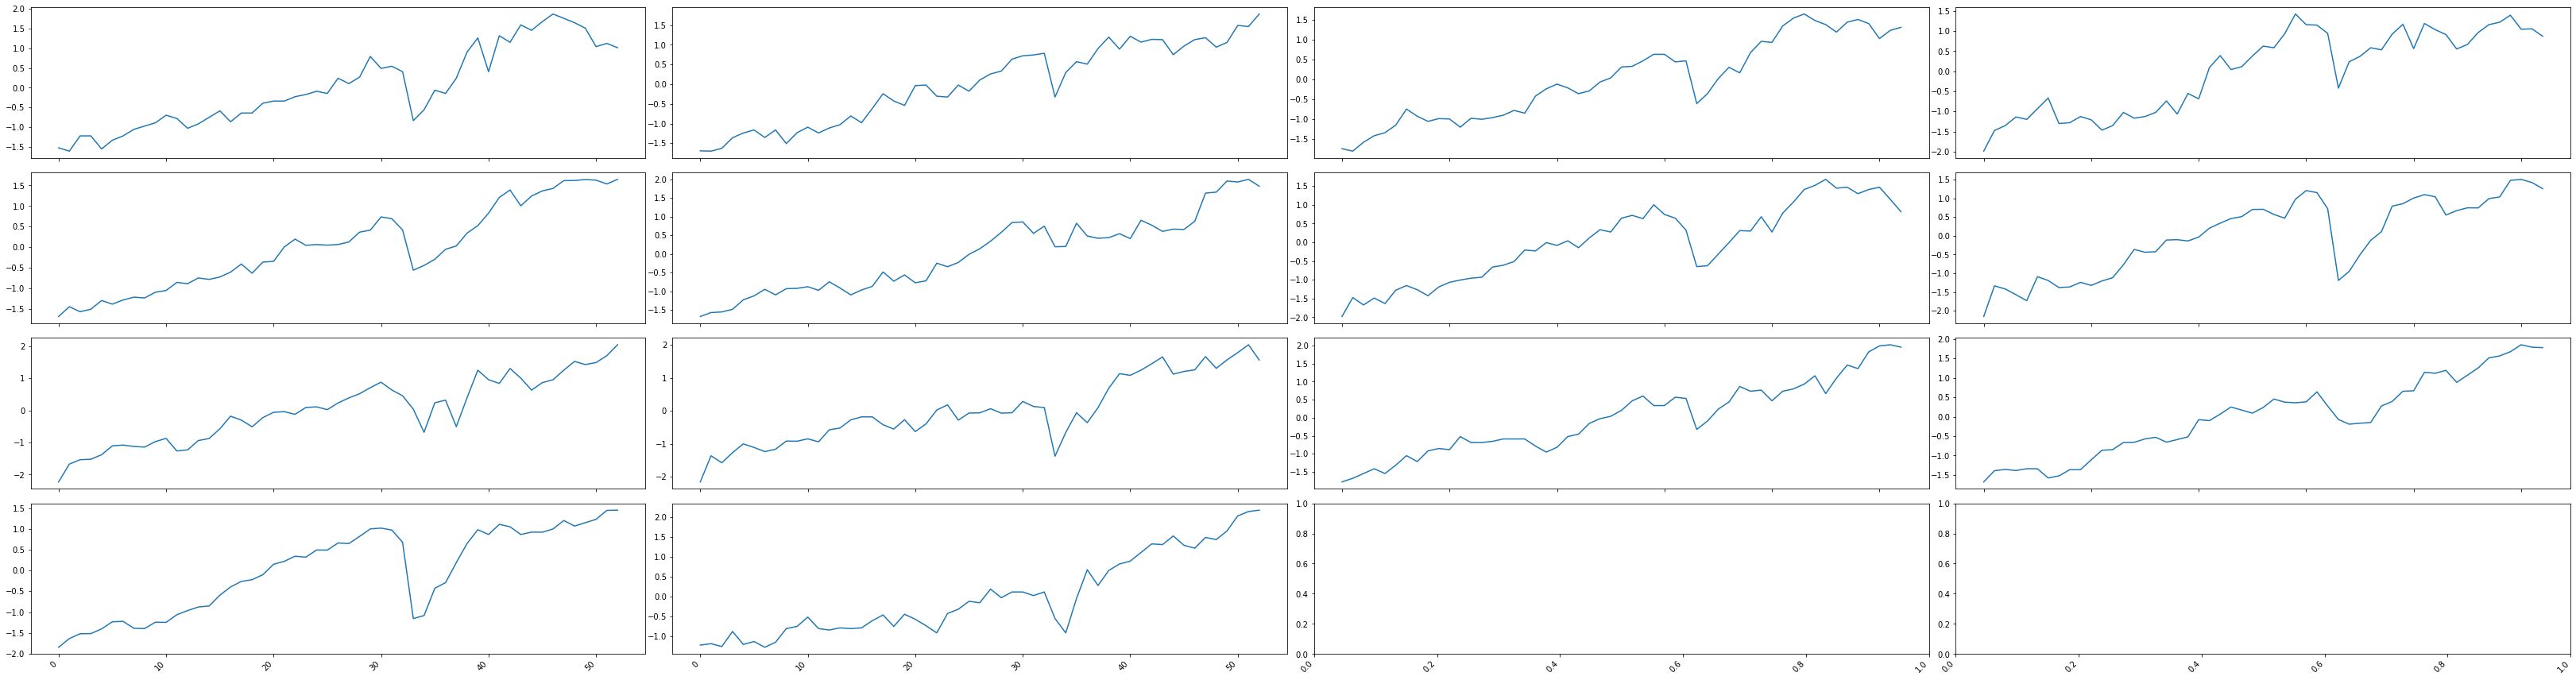

==========Cluster number: 1==========


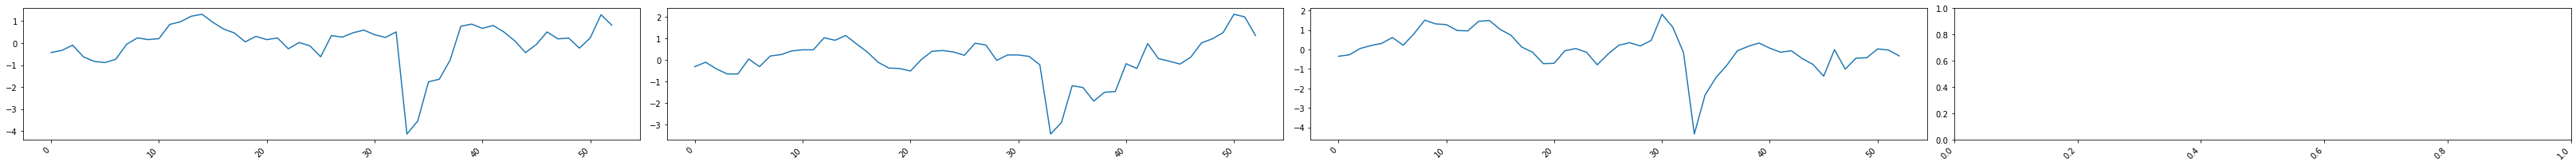

==========Cluster number: 2==========


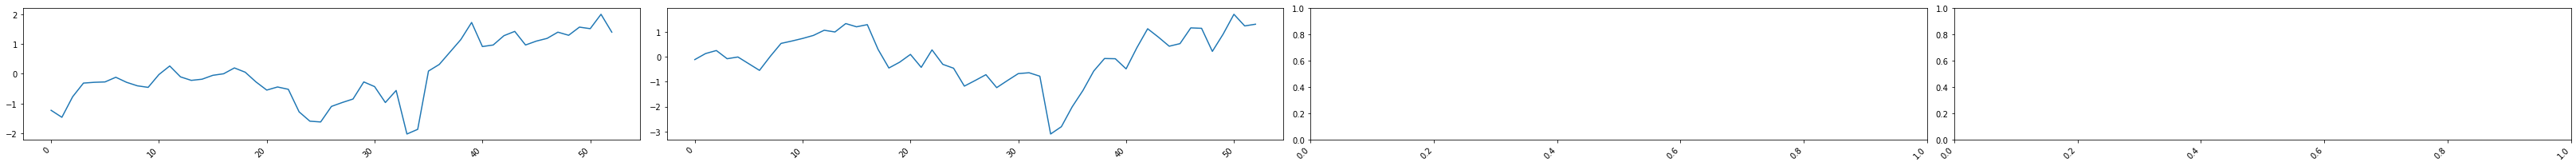

==========Cluster number: 3==========


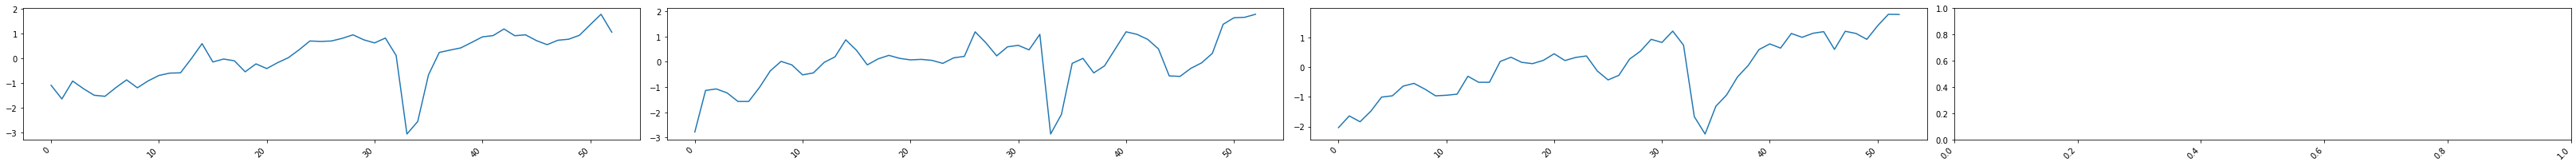

==========Cluster number: 4==========


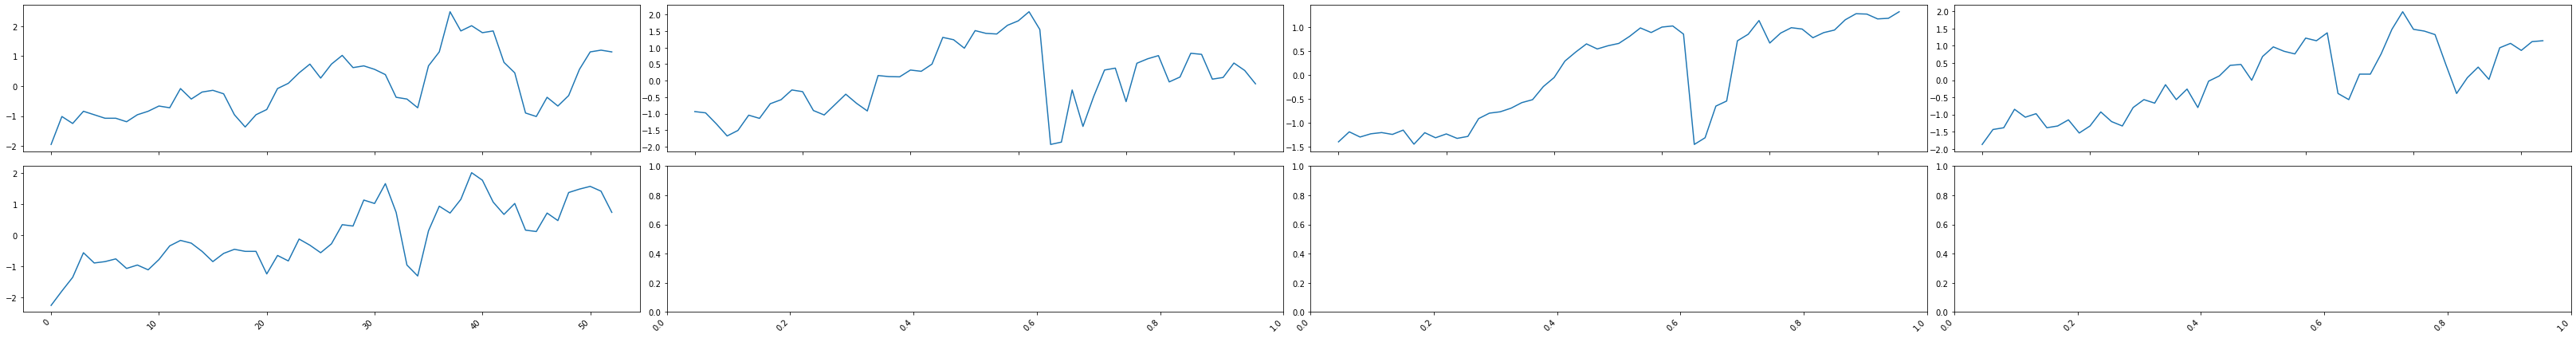

In [84]:
for cluster in range(len(ts_clustered)):
    print(f"==========Cluster number: {cluster}==========")
    plot_cluster_ts(ts_clustered[cluster])

A maioria das séries dentro do seu cluster são parecidas, o que é ótimo.

---

### 5. [Mapeamento de Clusters](https://www.kaggle.com/code/izzettunc/introduction-to-time-series-clustering/notebook)

Bem, nós agrupamos nossas séries, mas como sabemos qual série pertence a qual cluster? Não é esse o propósito do agrupamento?

Como podemos ver nas ilustrações, cada nó (ou múltiplos de nós em alguns casos) representa um cluster. Portanto, podemos descobrir qual série pertence a qual cluster verificando o nó vencedor de cada série.

In [85]:
# Supondo que series_df.index são os nomes das UFs
ufs = series_df.index.to_list()

# Cria um DataFrame com UF e cluster
cluster_df = pd.DataFrame({
    'UF': ufs,
    'cluster': cluster_labels
})

# Para pegar as UFs de cada cluster
clusters = {}
for cluster_id in np.unique(cluster_labels):
    clusters[cluster_id] = cluster_df.loc[cluster_df['cluster'] == cluster_id, 'UF'].to_list()

# Exemplo de impressão
for cluster_id, uf_list in clusters.items():
    print(f"Cluster {cluster_id}: {uf_list}")


Cluster 0: ['Amapá', 'Amazonas', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná', 'Pará', 'Roraima', 'Santa Catarina', 'São Paulo', 'Tocantins']
Cluster 1: ['Bahia', 'Paraíba', 'Piauí']
Cluster 2: ['Alagoas', 'Maranhão']
Cluster 3: ['Pernambuco', 'Rio Grande do Norte', 'Rio Grande do Sul']
Cluster 4: ['Acre', 'Ceará', 'Rio de Janeiro', 'Rondônia', 'Sergipe']


C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


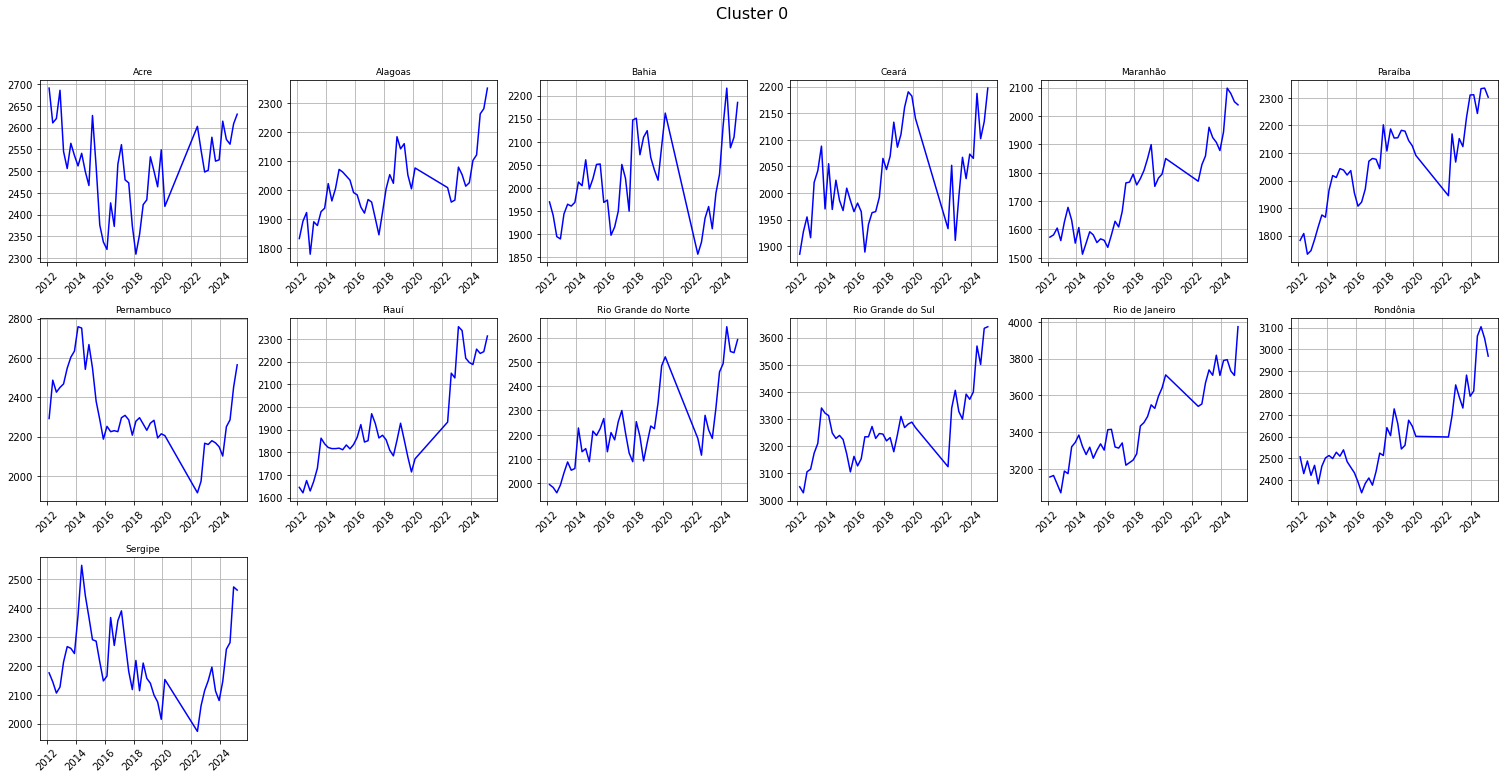

In [86]:
plot_series(renda[~renda.uf.isin(['Amapá', 'Amazonas', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná', 'Pará', 'Roraima', 'Santa Catarina', 'São Paulo', 'Tocantins'])], 'Cluster 0')

C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


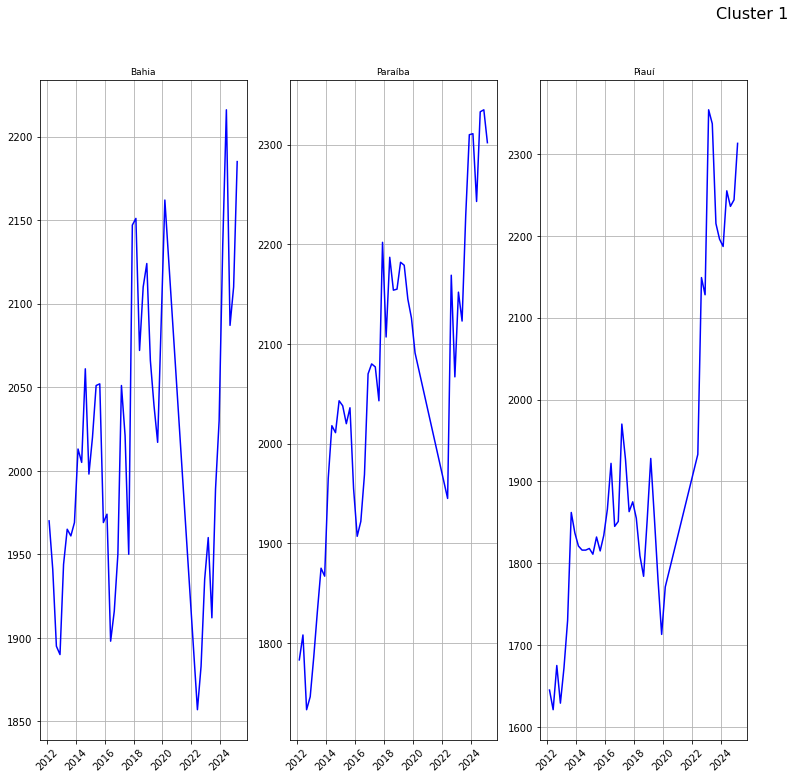

In [87]:
plot_series(renda[renda.uf.isin(['Bahia', 'Paraíba', 'Piauí'])], 'Cluster 1')

C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


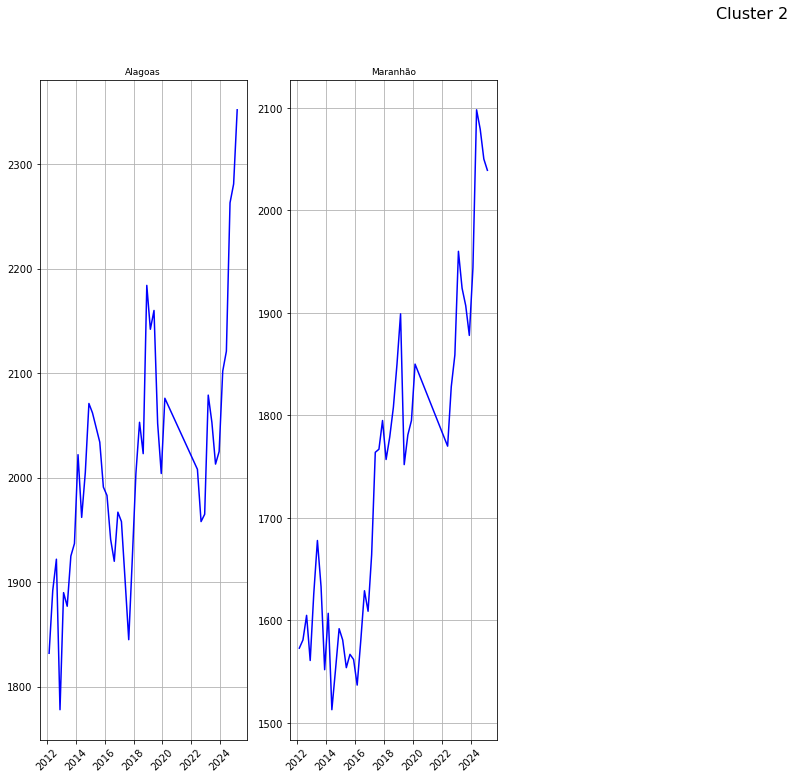

In [88]:
plot_series(renda[renda.uf.isin(['Alagoas', 'Maranhão'])], 'Cluster 2')

C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


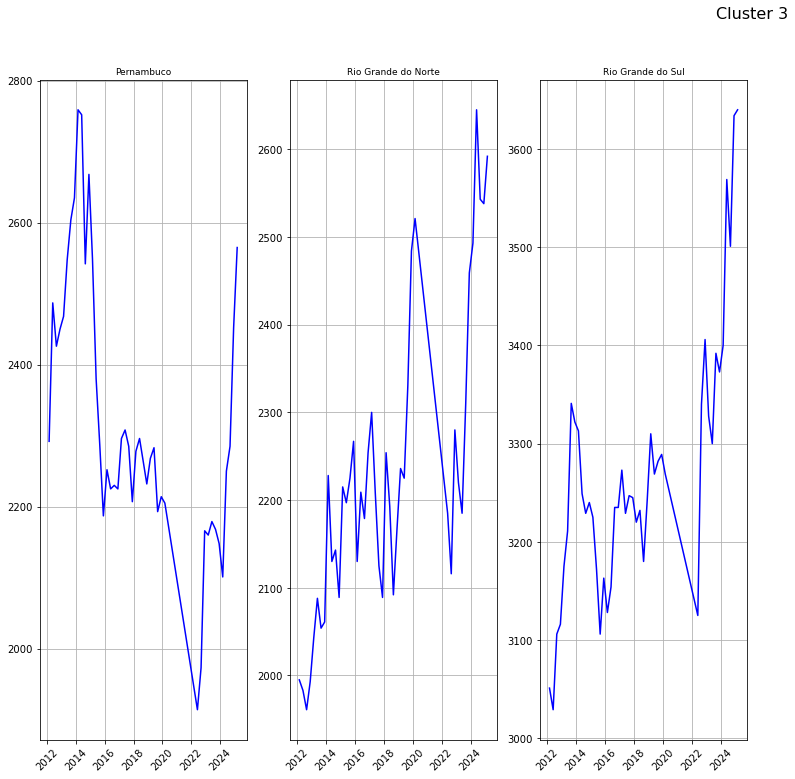

In [89]:
plot_series(renda[renda.uf.isin(['Pernambuco', 'Rio Grande do Norte', 'Rio Grande do Sul'])], 'Cluster 3')

C:\Users\Maria Rafaela\AppData\Local\Temp\ipykernel_13712\933689649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'])


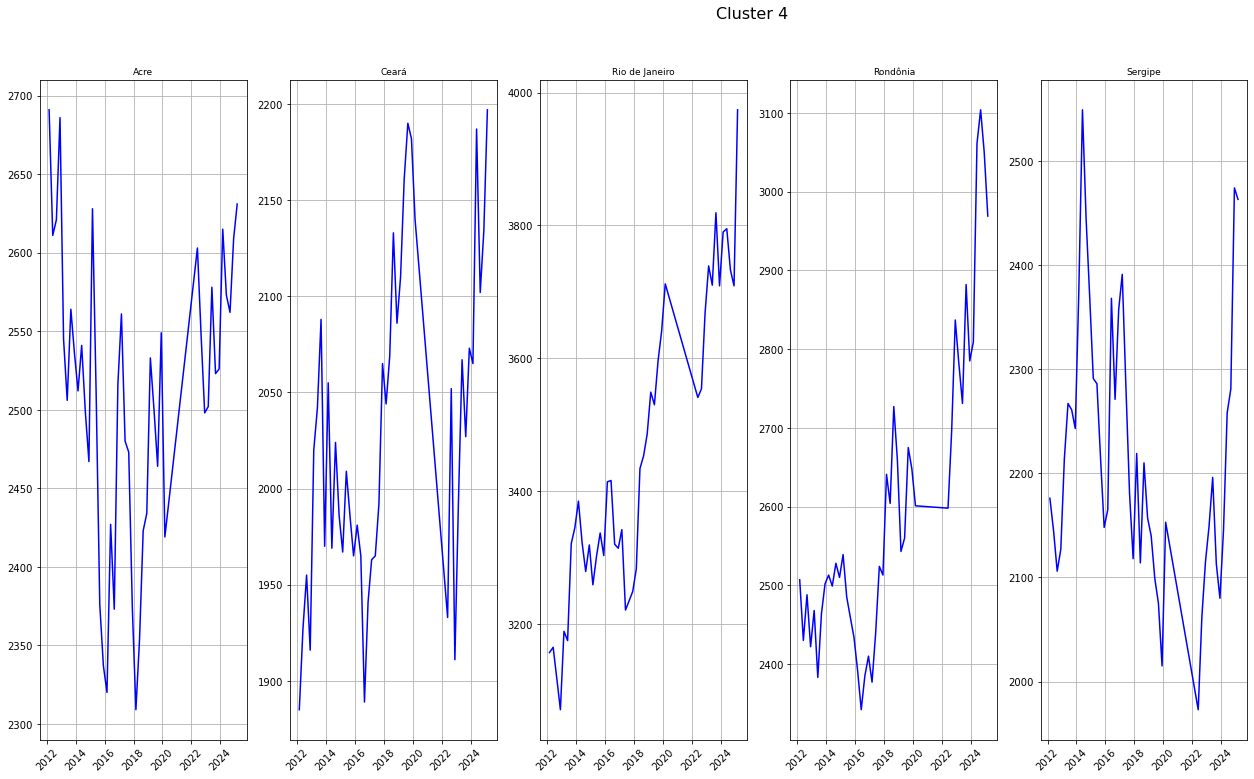

In [90]:
plot_series(renda[renda.uf.isin(['Acre', 'Ceará', 'Rio de Janeiro', 'Rondônia', 'Sergipe'])], 'Cluster 4')